# Final project: Stock Prediction

Given the recent stock market history, you will predict the return for ticker AAPL for the day ahead.

# Objectives

You will demonstrate your strengths in several areas, especially
- Exploratory Data Analysis
- Feature Engineering
- Creating, testing and evaluating models
- Error analysis
and Prediction **using Neural Networks**.

Your objective will be to predict next period price returns of a stock given its past prices.

**To be precise**
- given recent prices for AAPL you will predict the next *return*
- *return* will be defined precisely below
- you will be evaluated on a holdout data directory
    - it will have 2 years of data
    - you will be required to predict next period returns for the final 200 days
    - when making a prediction for date $t$, where $t$ is in the holdout data range (**beyond** the last training date)
        - you may use *actual* holdout data for dates strictlty prior to date $t$
        - That is: your prediction for date $t$ *does not* need to be dependent on your *prediction* for date $(t-1)$
    

**Predicting forward returns/prices is hard ! If you could do it well: you would be rich**

Given that fact, out of sample performance will **not** be the sole metric for your grade

This project will test your ability to analyze data, create hypotheses, test them, and improve through iteration.

**You will learn a lot, especially from failures**

This project provides a wealth of opportunity for
- Exploratory data analysis
    - This can suggest several different approaches to building one or more models
- Error Analysis
- Creating, and evaluating models iteratively, learning from past failures and successes.

So your performance will be based on your creativity and experimental process, even if the process
does not lead to great out of sample performance

# The data

As explained in the Final Project Overview:
- you will be given a data directory for training
    - supplied as a compressed archive file in the course's Resource tab in NYU Classes
    - unpacking this file will yield directory `./Data/train`

The data directory will contain one file per ticker, with a history going back many years of fields including
- Price: Close, Open, High, Low
- Volume

"return" means the percent change in the **Close** feature

You will need to 
- decide which files and which fields to use
- prepare the data for training and testing
    - convert from price to return as necessary
    - prepare train and test examples:
    

## Data preparation

- The files contain prices; your goal is to predict a *return* not a price
- Your goal is to predict the **percent change of the Close feature** ("return")
- Your predicted return for day $t$ should be a function of data occuring *before* day $t$

So your first step will be to create a suitable training set.

For example, the following training set is a good starting point:
- each row is an example
- each row will have a column `Dt` indicating time $t$
- each example has *at least* 20 features
    - derived from AAPL features occuring *before* time $t$
- the target for the row with time $t$ should be the *return* of AAPL for date $t$
    - i.e., the percent price change of AAPL from time $t-1$ to time $t$



# Out of sample evaluation

*You* should test your models out of sample.

This will be beneficial as *we* will evaluate your model out of sample using a holdout data directory.

The *holdout data directory* will be for dates that are strictly later than the latest date in the
training data directory.
- will contain 2 years of data
- you will be required to predict the latest 200 returns of AAPL for this holdout directory
- your submission *must work on the holdout directory*
    - you should assume the directory is at relative path  `./data/holdout`

So you might want to create your own validation/test data (from the training data directory) that mimics
what the holdout data directory will contain.

It is up to you to decide on the out of sample data that you use for model development.


# Suggestions for  getting started

The problem we presented to you is unstructured and not precisely defined in full detail.

- Start by defining, in detail,  the problem that you will attempt to solve
    - Do you view this as a Regression task ?  A Classification task
    - Justify your choice
~ Define the Performance Metric that you think is appropriate
    - Justify your choice

- Start with a simple model, using only data from AAPL (few features)
    - Use the model to get a feel for the problem
    - Will be a good baseline
    - Will help you form new hypotheses to test
        - may guide the choice of additional features
- Create new models iteratively
    - Train and evaluate a "simpler" model
    - Evalute performance
    - Perform error analysis
    - Propose a new "less simple" model
        - add as many features as you like, from any file in the directory

- Be disciplined in your process: avoid repeating code
    - It will be easier if you have a single piece of code that works for
        - the training directory
        - the test directory (that you might choose to create)
        - the holdout directory
    - This will
        - simplify your process
        - help ensure that your submission will work on the holdout directory !
   

# Warning: Avoid looking into the future !

Obviously, you should not use knowledge of the future to predict future prices.

But it is surprisingly easy to inadvertantly do so !  For example:
- when standardizing a data set: you might compute averages and standard deviations over the full range of dates
    - this means that the earliest dates have implicit knowledge of later dates
        - for example, suppose the mean increases after 10 days
        - the observations of the first 9 days *should not know* that the mean of the entire data range is different than what is available from earlier observations

# Evaluating your model
   
Your goals
- demonstrate that your models can predict in-sample (based on training only) somewhat successfully
    - this is easier than predicting out of sample
    - this will show that your model has "learned" something
- evaluate your model out of sample using the validation/test set you created
- run multiple experiments to try to improve out of sample prediction
- present a "final model" which we will evaluate with a holdout dataset
     - The holdut dataset will be identical in structure to the full data set we provide
     - *BUT* the dates will be strictly after the dates in the full dataset.

# Final reminder: document your thought process

**The key to getting a good grade** is to
- document everything you do
- justify the many choices you will have to make -- use data and intuition to back up your statements
- report on failed theories/experiments
    - it shows the amount of effort you expended
    - tell us
        - why you thought it was a good idea to try
        - what you learned from the failure
        - how the failure led you to try something different
        
The out of sample prediction is hard -- you may or may not do well.

What is important is to see how you tried to improve and how failure as well as success led to
better experiments.

# Get the Data 
## Get the data
### Architecture - ``easyAccess``
Considering we have different csv files with different variables, I firstly create a automatic data accessing tool in support of future data acquicision. 
Now, let me introduce the functionalities of ``easyAccess`` module. 

In [1006]:
import os
import pandas as pd
import numpy as np
results = []

class easyAccess:
    def __init__(self, data_path='./Data/train'):
        self.data_path = data_path
        self.file_names = os.listdir(data_path)
        self.comp_names = [x.split('.')[0] for x in self.file_names]
        self.file_dict = dict(zip(self.comp_names, self.file_names))
    
    @classmethod
    def printAll(cls, data_path='./Data/train', mute=True):
        obj = cls(data_path)
        if not mute:
            for i, comp in enumerate(obj.comp_names):
                print(i+1, comp)
        return obj.comp_names
    
    @classmethod
    def printDetail(cls, data_path='./Data/train'):
        obj = cls(data_path)
        for key, value in obj.file_dict.items():
            print(key, end=':\t')
            df = pd.read_csv(os.path.join(obj.data_path, value))
            print(", ".join(list(df.columns)))
    
    @classmethod
    def lsGetData(cls, var_ls=None, data_path='./Data/train'):
        """
        Get data by transferring in a variable-name list and fetch data for all the companies. 
        """
        if not var_ls or var_ls == []:
            return None
        obj = cls(data_path)
        result = None
        for key, value in obj.file_dict.items():
            df = pd.read_csv(os.path.join(obj.data_path, value))
            df['Dt'] = pd.to_datetime(df['Dt'], format='%Y-%m-%d')
            df.set_index('Dt', inplace=True)
            df = df[var_ls]
            df.columns = [' '.join([key, x]) for x in df.columns]
            if result is None:
                result = df
            else:
                result = result.merge(df, how='outer', left_index=True, right_index=True)
        print('Data acquisition completed!', ", ".join(var_ls))
        return result
                
    @classmethod
    def lsGetCompData(cls, var_ls=None, comp_ls=None, data_path='./Data/train'):
        """
        Get data by transferring in a variable-name list and fetch data for all the companies. 
        """
        if not var_ls or var_ls == []:
            return None
        obj = cls(data_path)
        result = None
        for key in comp_ls:
            value = obj.file_dict[key]
            df = pd.read_csv(os.path.join(obj.data_path, value))
            df['Dt'] = pd.to_datetime(df['Dt'], format='%Y-%m-%d')
            df.set_index('Dt', inplace=True)
            df = df[var_ls]
            df.columns = [' '.join([key, x]) for x in df.columns]
            if result is None:
                result = df
            else:
                result = result.merge(df, how='outer', left_index=True, right_index=True)
        print('Data acquisition completed!', ", ".join(var_ls))
        return result
        

#### Variable Display Tool
To begin with, I create ``printDetail`` and ``printAll`` functions to get information about the dataset. ``printAll`` is able to print all the company names. ``printDetail`` can print not only the company names but also variable names associated with that company. 

Let's have a look at ``printDetail``.

In [1007]:
easyAccess.printDetail()

CSCO:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
V:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
ADBE:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
XLE:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
INTC:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
XLF:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
XLP:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
MSFT:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
ACN:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
XLB:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
XLU:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
NVDA:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
XLV:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
FB:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
IBM:	Dt, Adj Close, Close, Div, Factor, High, Low, Open, Volume
XLY:	Dt, Adj Close, Close, Div, Factor

As shown above, I can have access to 24 companies' data. Apart from Apple, several internet giants are also included in the data, such as Microsoft and Google, etc. They might highly correlate with Apple stock price and have impact on predicting future Apple stock return. 

The second observation is that each company's data has the same variable, which is convenient. All of them have high, low, open, close variables, which also makes it possible to calculate intraday volatility. 

#### Data Acquisition Tool
Next,let me introduce the second powerful tool -- ``lsGetData``. This tool takes in a list of variable names and returns a pandas dataframe which include the variable for *all the companies*. 

In [1008]:
easyAccess.lsGetData(['Adj Close', 'Close'])

Data acquisition completed! Adj Close, Close


,CSCO Adj Close,CSCO Close,V Adj Close,V Close,ADBE Adj Close,ADBE Close,XLE Adj Close,XLE Close,INTC Adj Close,INTC Close,...,GOOG Adj Close,GOOG Close,XLRE Adj Close,XLRE Close,MA Adj Close,MA Close,AAPL Adj Close,AAPL Close,CRM Adj Close,CRM Close
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-03,42.1339,108.063,NaN,NaN,16.2747,65.563,17.9536,26.563,28.0137,43.500,...,NaN,NaN,NaN,NaN,NaN,NaN,3.4785,111.938,NaN,NaN
2000-01-04,39.7701,102.000,NaN,NaN,14.9094,60.063,17.6156,26.063,26.7056,41.469,...,NaN,NaN,NaN,NaN,NaN,NaN,3.1852,102.500,NaN,NaN
2000-01-05,39.6482,101.688,NaN,NaN,15.2042,61.250,18.0803,26.750,26.9270,41.813,...,NaN,NaN,NaN,NaN,NaN,NaN,3.2318,104.000,NaN,NaN
2000-01-06,38.9903,100.000,NaN,NaN,15.3283,61.750,18.7773,27.781,25.3572,39.375,...,NaN,NaN,NaN,NaN,NaN,NaN,2.9521,95.000,NaN,NaN
2000-01-07,41.2810,105.875,NaN,NaN,16.0730,64.750,18.9780,28.078,26.4037,41.000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0920,99.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,27.8207,30.530,76.7238,78.15,105.0200,105.020,69.8796,76.350,34.2162,36.970,...,789.91,789.91,27.7296,30.33,102.8042,104.71,111.3073,116.520,69.87,69.87
2016-12-27,27.9574,30.680,76.9202,78.35,104.9800,104.980,70.0352,76.520,34.3088,37.070,...,791.55,791.55,27.8028,30.41,102.8926,104.80,112.0142,117.260,69.85,69.85
2016-12-28,27.7205,30.420,76.8711,78.30,103.7700,103.770,69.2756,75.690,33.9015,36.630,...,785.05,785.05,27.5925,30.18,101.7930,103.68,111.5366,116.760,69.09,69.09


What if we only want Apple's close price because it's the target of our model? The solution is ``lsGetCompData``. We can transfer in a company list to get only certain companies' data. For example, we can use the following command to get 'Adj Close' and 'Close' data for Apple. 

In [1009]:
easyAccess.lsGetCompData(['Adj Close', 'Close'], comp_ls=['AAPL'])

Data acquisition completed! Adj Close, Close


,AAPL Adj Close,AAPL Close
Dt,,
2000-01-03,3.4785,111.938
2000-01-04,3.1852,102.500
2000-01-05,3.2318,104.000
2000-01-06,2.9521,95.000
2000-01-07,3.0920,99.500
...,...,...
2016-12-23,111.3073,116.520
2016-12-27,112.0142,117.260
2016-12-28,111.5366,116.760


### Obtain ``data_1``
I want to fetch all of them and have a look. So I create the dataframe ``data_1`` which inlcudes all the variables.

In [1010]:
data_1 = easyAccess.lsGetData(["Adj Close", "Close", "Div", "Factor", "High", "Low", "Open", "Volume"])
data_1

Data acquisition completed! Adj Close, Close, Div, Factor, High, Low, Open, Volume


,CSCO Adj Close,CSCO Close,CSCO Div,CSCO Factor,CSCO High,CSCO Low,CSCO Open,CSCO Volume,V Adj Close,V Close,...,AAPL Open,AAPL Volume,CRM Adj Close,CRM Close,CRM Div,CRM Factor,CRM High,CRM Low,CRM Open,CRM Volume
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-03,42.1339,108.063,0.0,1.0,110.2500,103.5630,109.9380,53076000.0,NaN,NaN,...,104.8750,133949200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,39.7701,102.000,0.0,1.0,107.0000,101.7500,105.5000,50805600.0,NaN,NaN,...,108.2500,128094400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,39.6482,101.688,0.0,1.0,104.5000,97.2500,100.0630,68524000.0,NaN,NaN,...,103.7500,194580400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,38.9903,100.000,0.0,1.0,101.8750,98.6250,100.8130,48242600.0,NaN,NaN,...,106.1183,191993200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,41.2810,105.875,0.0,1.0,106.0000,99.3750,99.3751,62260600.0,NaN,NaN,...,96.5000,115183600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,27.8207,30.530,0.0,1.0,30.6000,30.4000,30.5400,9167500.0,76.7238,78.15,...,115.5900,14249500.0,69.87,69.87,0.0,1.0,70.0100,69.31,69.69,2274000.0
2016-12-27,27.9574,30.680,0.0,1.0,30.8200,30.6000,30.6400,14175500.0,76.9202,78.35,...,116.5200,18296900.0,69.85,69.85,0.0,1.0,70.4260,69.64,69.84,2939700.0
2016-12-28,27.7205,30.420,0.0,1.0,30.7700,30.3503,30.7000,12022200.0,76.8711,78.30,...,117.5200,20905900.0,69.09,69.09,0.0,1.0,70.0600,68.85,69.85,4313700.0


## Have a look
The dataframe has 4277 rows and 192 columns. The 4277 rows span over 17-year. The 192 columns are equal to 24 companies multiplied by 8 features. 

Unfortunately, I saw some Not Available data. This problem needs to be fixed in data preparation process. 

## Define Performance Measure

###  ``MeanSquaredError``
The target of this deep learning project is to predict Apple's one-day ahead stock price. In this sense, I see it as a **regression task**. In this case, I choose to use Keras' ``MeanSquaredError``.

### ``Transaction Based Metric`` - especially designed for this problem. 
The purpose of doing this prediction problem is to find arbitrage or investment opportunities with Apple stock. So, I customized a transaction-based measure. Basically, this value is asset cumulative return from a simple strategy - all in or nothing. This metric is called ``asset_return``.

I make the following assumptions in calculating this error:
- Strategy: the fund starts from 1 unit of capital. It has two choices: invest in Apple's stock or do nothing. When the predicted return is positive, the fund chooses to invest in AAPL and earn the real return rate on that day. Otherwise, the net value stays the same. 
- Transaction fee: I assume there is no transaction fee. The purpose of this strategy is to minimize the loss in deep learning model instead of real-world trading activity. 
- Risk-free rate: I set it to be 2%.

In [1011]:
import tensorflow as tf

@tf.autograph.experimental.do_not_convert
def asset_return(y_true, y_pred):
    exe = tf.greater(y_pred, tf.constant([0.0]))
    exe_flt = tf.cast(exe, dtype=tf.float32)
    ret = tf.multiply(exe_flt, y_true)
    return tf.add(tf.reduce_prod(tf.add(ret, tf.constant([1.0]))),  tf.constant([-1.0]))

For convenience, I also create the following function to plot the growth of net value from the simple strategy described above. 

In [1012]:
import matplotlib.pyplot as plt

def net_value(y_true, y_pred):
    y_true = np.array(y_true).reshape((-1))
    y_pred = np.array(y_pred).reshape((-1))
    pos = np.where(y_pred > 0, 1, 0) # the position a fund holds: 0 or 1
    ret = np.where(pos > 0, 1 + y_true, 1)
    nv = np.cumprod(ret)
    return nv

```{warning}
This transaction based metric is just an additional reference for deciding which model to use. When two model has similar out-sample mse level, I will choose one with higher asset_return or with more robust net value growth. 
```

## Create test set
In this part, I need firstly add percentage changes to avoid future trouble. The percentage data merges with ``data_1`` into ``data_2``. 

In [1013]:
data_pct = data_1.pct_change()
data_pct.columns = ["pct " + x for x in data_pct.columns]
data_pct

,pct CSCO Adj Close,pct CSCO Close,pct CSCO Div,pct CSCO Factor,pct CSCO High,pct CSCO Low,pct CSCO Open,pct CSCO Volume,pct V Adj Close,pct V Close,...,pct AAPL Open,pct AAPL Volume,pct CRM Adj Close,pct CRM Close,pct CRM Div,pct CRM Factor,pct CRM High,pct CRM Low,pct CRM Open,pct CRM Volume
Dt,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.056102,-0.056106,NaN,0.0,-0.029478,-0.017506,-0.040368,-0.042776,NaN,NaN,...,0.032181,-0.043709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,-0.003065,-0.003059,NaN,0.0,-0.023364,-0.044226,-0.051536,0.348749,NaN,NaN,...,-0.041570,0.519039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,-0.016593,-0.016600,NaN,0.0,-0.025120,0.014139,0.007495,-0.295975,NaN,NaN,...,0.022827,-0.013296,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,0.058751,0.058750,NaN,0.0,0.040491,0.007605,-0.014263,0.290573,NaN,NaN,...,-0.090638,-0.400064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-23,0.002299,0.002298,NaN,0.0,0.003937,0.004942,0.004605,-0.291308,0.003209,0.003209,...,-0.006532,-0.453747,-0.000429,-0.000429,NaN,0.0,-0.000714,0.001296,-0.001290,-0.344404
2016-12-27,0.004914,0.004913,NaN,0.0,0.007190,0.006579,0.003274,0.546278,0.002560,0.002559,...,0.008046,0.284038,-0.000286,-0.000286,NaN,0.0,0.005942,0.004761,0.002152,0.292744
2016-12-28,-0.008474,-0.008475,NaN,0.0,-0.001622,-0.008160,0.001958,-0.151903,-0.000638,-0.000638,...,0.008582,0.142592,-0.010880,-0.010880,NaN,0.0,-0.005197,-0.011344,0.000143,0.467395


In [1014]:
data_2 = data_1.merge(data_pct, how='left', left_index=True, right_index=True)
data_2 = data_2.iloc[1:, :]
print("The shape of the new data is", data_2.shape)

The shape of the new data is (4276, 384)


After I merge percentage change into data_1, data_2 has twice the column number as data_1 before discarding the first row used for calculating percentage change. The goal is to predict next-day's AAPL return rate. So I shift AAPL's close return rate by 1 business day. Then I take the shifted return rate as Y, take the original data frame as X. No future data will get leaked in this process. 

In [1015]:
print(data_2[["pct AAPL Close"]].tail())
Y = data_2["pct AAPL Close"].shift(-1)
print(Y.tail())

            pct AAPL Close
Dt                        
2016-12-23        0.001978
2016-12-27        0.006351
2016-12-28       -0.004264
2016-12-29       -0.000257
2016-12-30       -0.007796
Dt
2016-12-23    0.006351
2016-12-27   -0.004264
2016-12-28   -0.000257
2016-12-29   -0.007796
2016-12-30         NaN
Name: pct AAPL Close, dtype: float64


In [1016]:
X, Y = data_2.iloc[:-1, ], Y.iloc[:-1]
assert X.shape[0] == 4275, "Error in X treatment. Maybe run this code chunk for multiple times."
assert Y.shape[0] == 4275, "Error in X treatment. Maybe run this code chunk for multiple times."
print("Shape of X:", X.shape, "Shape of Y:", Y.shape)

Shape of X: (4275, 384) Shape of Y: (4275,)


Now, I obtained two dataframes X and Y. X consists of 192 variables from the original data and 192 variables after making percentage change. Y is AAPL's close return rate shifted to 1 day ahead. 

The two ``assert`` sentences ensure that both X and Y are of correct shape. 

With the two matrices at hand, I will split them into training set, cross validation set, and test set. As the data is serial correlated, I will set shuffle to False as I use sklearn's train_test_split function (to prevent data leakage). The data will be splitted into the following three parts:
- 80% for training set.
- 10% for cross validation set.
- 10% for testing set.

As there are 4275 rows, the sample amount for the three categories is adequate. 

In [1017]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=X.shape[0] // 10, shuffle=False)
print("The shape of X_train", X_train.shape)
print("X_train starts from", min(X_train.index))
print("X_train ends at", max(X_train.index), end='\n\n')

print("The shape of X_test", X_test.shape)
print("X_test starts from", min(X_test.index))
print("X_test ends at", max(X_test.index), end='\n\n')

print("The shape of Y_train", Y_train.shape)
print("Y_train starts from", min(Y_train.index))
print("Y_train ends at", max(Y_train.index), end='\n\n')

print("The shape of Y_test", Y_test.shape)
print("Y_test starts from", min(Y_test.index))
print("Y_test ends at", max(Y_test.index), end='\n\n')

The shape of X_train (3848, 384)
X_train starts from 2000-01-04 00:00:00
X_train ends at 2015-04-22 00:00:00

The shape of X_test (427, 384)
X_test starts from 2015-04-23 00:00:00
X_test ends at 2016-12-29 00:00:00

The shape of Y_train (3848,)
Y_train starts from 2000-01-04 00:00:00
Y_train ends at 2015-04-22 00:00:00

The shape of Y_test (427,)
Y_test starts from 2015-04-23 00:00:00
Y_test ends at 2016-12-29 00:00:00



In [1018]:
X_train1, X_cv, Y_train1, Y_cv = train_test_split(X_train, Y_train, test_size=X.shape[0] // 10, shuffle=False)
print("The shape of X_train1", X_train1.shape)
print("X_train1 starts from", min(X_train1.index))
print("X_train1 ends at", max(X_train1.index), end='\n\n')

print("The shape of X_cv", X_cv.shape)
print("X_cv starts from", min(X_cv.index))
print("X_cv ends at", max(X_cv.index), end='\n\n')

print("The shape of Y_train1", Y_train1.shape)
print("Y_train1 starts from", min(Y_train1.index))
print("Y_train1 ends at", max(Y_train1.index), end='\n\n')

print("The shape of Y_cv", Y_cv.shape)
print("Y_cv starts from", min(Y_cv.index))
print("Y_cv ends at", max(Y_cv.index), end='\n\n')

The shape of X_train1 (3421, 384)
X_train1 starts from 2000-01-04 00:00:00
X_train1 ends at 2013-08-09 00:00:00

The shape of X_cv (427, 384)
X_cv starts from 2013-08-12 00:00:00
X_cv ends at 2015-04-22 00:00:00

The shape of Y_train1 (3421,)
Y_train1 starts from 2000-01-04 00:00:00
Y_train1 ends at 2013-08-09 00:00:00

The shape of Y_cv (427,)
Y_cv starts from 2013-08-12 00:00:00
Y_cv ends at 2015-04-22 00:00:00



Now, I have created training set, cross validation set and test set as planed. After examining the start time and end time for each set, it is certain that test set is ahead of training set and cv set. Cv set is ahead of training set. In this way, no future sample will leak into training set. From now on, I will only work on training set and cv set. Test set will not be used until the final evaluation stage. 

# Exploratory Data Analysis
## Visualization
### Architecture - ``VisualEDA``
In this part, I have created this ``VisualEDA`` tool to help me visualize the data. Apparently, this kind of architecture is useful in recycling code when multiple iterations is implemented. 

The functionality of this EDA visulization tool includes:
- Descriptive summary.
- Distribution plot.
- Scatter plot between X and Y. 
- NaN counter.
- NaN summary report.
- Outlier visualization.
- Correlation matrix.

In [1019]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


class VisualEDA:
    @classmethod
    def DesTable(cls, df: pd.DataFrame):
        return df.describe().T
    
    @classmethod
    def DesBoxplot(cls, df: pd.DataFrame):
        return df.plot(kind='density', subplots=True, layout=(8, 4), figsize=(20, 20), sharex=False)
    
    @classmethod
    def PlotTrend(cls, X: pd.DataFrame, y: pd.DataFrame):
        df = X.copy()
        df['y'] = y
        return df.plot(x = X.columns[0], y = "y", kind='scatter', figsize=(4, 4))
    
    @classmethod
    def CountNa(cls, X: pd.DataFrame):
        return X.isna().sum(axis=0)
    
    @classmethod
    def ReportNa(cls, na_number: pd.Series):
        plot = na_number.plot()
        na_variables = na_number > 0
        na_num = na_variables.sum()
        print("{} out of all variables have NaN.".
              format(na_num))
        print("5 variables with the most NaN:\n\n",
              na_number.sort_values(ascending=False).head())
        return plot
    
    @classmethod
    def OutlierPlot(cls, X_train, n_std=3):
        temp = X_train.describe().T[["mean", "max", "min", "std"]]
        temp['max'] = (temp['max'] - temp['mean']) / temp['std']
        temp['min'] = (temp['min'] - temp['mean']) / temp['std']
        temp['std_down'], temp['std_up'] = -n_std, n_std
        return temp[['max', 'min', 'std_down', 'std_up']].plot()
    
    @classmethod
    def OutlierPercentage(cls, X_train, n_std=3):
        temp = ((X_train - X_train.mean()) / X_train.std()).abs()
        temp = (temp > n_std)
        temp = temp.sum() / temp.count()
        print("Highest outlier percentage defined by >= {b} std is {a: .4f}.".format(a=temp.max(), b=n_std))
        print("Lowest outlier percentage defined by >= {b} std is {a: .4f}.\n".format(a=temp.min(), b=n_std))
        print("5 variables with largest percentage of outliers:\n")
        print(temp.sort_values(ascending=False).head())
        return temp.plot()
    
    @classmethod
    def CorrelationShow(cls, X_train):
        return X_train.corr().round(2)

### Descriptive summary
Firstly, let's have a look at the basic numeric relationship in each variable. Due to the high number of volumn, I will group by variable name and show in seperate tables. To assist this, I create the following ``ColSelector`` tool, which helps in selecting features with given company list, variable names, variable series name list. 

In [1020]:
def ColSelector(var_ls, series=['', 'pct'], comp_list=None):
    if not var_ls:
        return None
    if not comp_list:
        comp_list = easyAccess.printAll()
    res = []
    for se in series:
        for var in var_ls:
            for comp in comp_list:
                s = " ".join([se, comp, var])
                s = s.strip()
                res.append(s)
    return res

In [1021]:
VisualEDA.DesTable(X_train[ColSelector(var_ls=['Adj Close'], series=['pct'])])

,count,mean,std,min,25%,50%,75%,max
pct CSCO Adj Close,3848.0,0.000214,0.026598,-0.162106,-0.010954,0.000432,0.011516,0.243875
pct V Adj Close,1785.0,0.001218,0.021305,-0.136436,-0.009028,0.000896,0.011377,0.149973
pct ADBE Adj Close,3848.0,0.000844,0.029782,-0.297583,-0.012338,0.000494,0.013352,0.239720
pct XLE Adj Close,3848.0,0.000520,0.017893,-0.144437,-0.008218,0.000882,0.010095,0.164745
pct INTC Adj Close,3848.0,0.000318,0.024931,-0.220330,-0.011235,0.000369,0.011924,0.201230
pct XLF Adj Close,3848.0,0.000302,0.020325,-0.166664,-0.007257,0.000483,0.008082,0.164640
pct XLP Adj Close,3848.0,0.000334,0.009551,-0.060240,-0.004514,0.000538,0.005291,0.068856
pct MSFT Adj Close,3848.0,0.000212,0.020160,-0.155976,-0.008728,0.000000,0.009218,0.195654
pct ACN Adj Close,3459.0,0.000794,0.020541,-0.134541,-0.008756,0.000385,0.009942,0.163668
pct XLB Adj Close,3848.0,0.000393,0.016092,-0.124122,-0.007552,0.000809,0.008719,0.140576


In [1022]:
VisualEDA.DesTable(X_train[ColSelector(var_ls=['Close'], series=['pct'])])

,count,mean,std,min,25%,50%,75%,max
pct CSCO Close,3848.0,0.000046,0.027591,-0.461035,-0.011041,0.000350,0.011494,0.243884
pct V Close,1785.0,0.000688,0.027760,-0.750402,-0.009162,0.000792,0.010944,0.149973
pct ADBE Close,3848.0,0.000578,0.031832,-0.500695,-0.012362,0.000446,0.013343,0.239740
pct XLE Close,3848.0,0.000453,0.017894,-0.144438,-0.008243,0.000818,0.010034,0.164747
pct INTC Close,3848.0,0.000238,0.024946,-0.220317,-0.011319,0.000328,0.011788,0.201229
pct XLF Close,3848.0,0.000242,0.021312,-0.188004,-0.007438,0.000363,0.008091,0.224715
pct XLP Close,3848.0,0.000247,0.009600,-0.060241,-0.004718,0.000456,0.005267,0.068857
pct MSFT Close,3848.0,-0.000010,0.021639,-0.483230,-0.008852,0.000000,0.009167,0.195652
pct ACN Close,3459.0,0.000736,0.020522,-0.134543,-0.008797,0.000367,0.009838,0.163668
pct XLB Close,3848.0,0.000299,0.016110,-0.124121,-0.007743,0.000753,0.008671,0.140576


In [1023]:
VisualEDA.DesTable(X_train[ColSelector(var_ls=['Div'], series=['pct'])])

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:4012: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t>=0.5)
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:4011: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a*t, out=out))


,count,mean,std,min,25%,50%,75%,max
pct CSCO Div,34.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct V Div,54.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct ADBE Div,42.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct XLE Div,122.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct INTC Div,122.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct XLF Div,122.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct XLP Div,122.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct MSFT Div,90.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct ACN Div,34.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf
pct XLB Div,122.0,inf,NaN,-1.0,-1.0,NaN,NaN,inf


In [1024]:
VisualEDA.DesTable(X_train[ColSelector(var_ls=['Factor'], series=['pct'])])

,count,mean,std,min,25%,50%,75%,max
pct CSCO Factor,3848.0,0.000130,0.018025,-0.500000,0.0,0.0,0.0,1.000
pct V Factor,1785.0,0.001261,0.073202,-0.750000,0.0,0.0,0.0,3.000
pct ADBE Factor,3848.0,0.000260,0.025491,-0.500000,0.0,0.0,0.0,1.000
pct XLE Factor,3848.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000
pct INTC Factor,3848.0,0.000130,0.018025,-0.500000,0.0,0.0,0.0,1.000
pct XLF Factor,3848.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000
pct XLP Factor,3848.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000
pct MSFT Factor,3848.0,0.000130,0.018025,-0.500000,0.0,0.0,0.0,1.000
pct ACN Factor,3459.0,0.002342,0.153794,-0.900000,0.0,0.0,0.0,9.000
pct XLB Factor,3848.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000


In [1025]:
VisualEDA.DesTable(X_train[ColSelector(var_ls=['Volume'], series=['pct'])])

,count,mean,std,min,25%,50%,75%,max
pct CSCO Volume,3848.0,0.100708,1.181903,-0.988928,-0.190523,-0.007381,0.222798,56.077907
pct V Volume,1785.0,0.090547,0.551358,-0.867981,-0.218969,-0.016021,0.261013,7.826715
pct ADBE Volume,3848.0,0.093775,0.536557,-0.814538,-0.228105,-0.017894,0.267987,6.442082
pct XLE Volume,3848.0,0.350846,2.245913,-0.980821,-0.253495,-0.005866,0.340260,60.318352
pct INTC Volume,3848.0,0.077953,1.214007,-0.985366,-0.173819,-0.007379,0.210657,70.625238
pct XLF Volume,3848.0,0.248887,1.261178,-0.970240,-0.291449,-0.009501,0.384897,25.981972
pct XLP Volume,3848.0,0.459607,2.804480,-0.984180,-0.344978,0.005380,0.506773,82.476923
pct MSFT Volume,3848.0,0.062029,0.421801,-0.861203,-0.181210,-0.009252,0.210321,6.234345
pct ACN Volume,3459.0,0.117629,0.693560,-0.904709,-0.232326,-0.015766,0.276995,11.728335
pct XLB Volume,3848.0,0.449965,2.496993,-0.988553,-0.314426,-0.013960,0.412942,58.536842


From the data above, we can have the following observations:
- XLRE (Real Estate Select Sector SPDR Fund) data is not available for a long period. We will not use it as our feature.
- Dividend data is of low frequency. To better serve our purpose, we cannot use it directly or use its percentage change. It might be a good idea to use dividend rate, as a percentage of stock price. 
- Facebook, Google, Visa, Mastercard, Accenture, Salesforce's data also has a shorter period of time. We will exclude it from our analysis for now.
- All of the data are numeric.
- AAPL's return rate is quite volatile. 

### Feature distribution
Next, I plot the distribution of stock close price return and volume. 

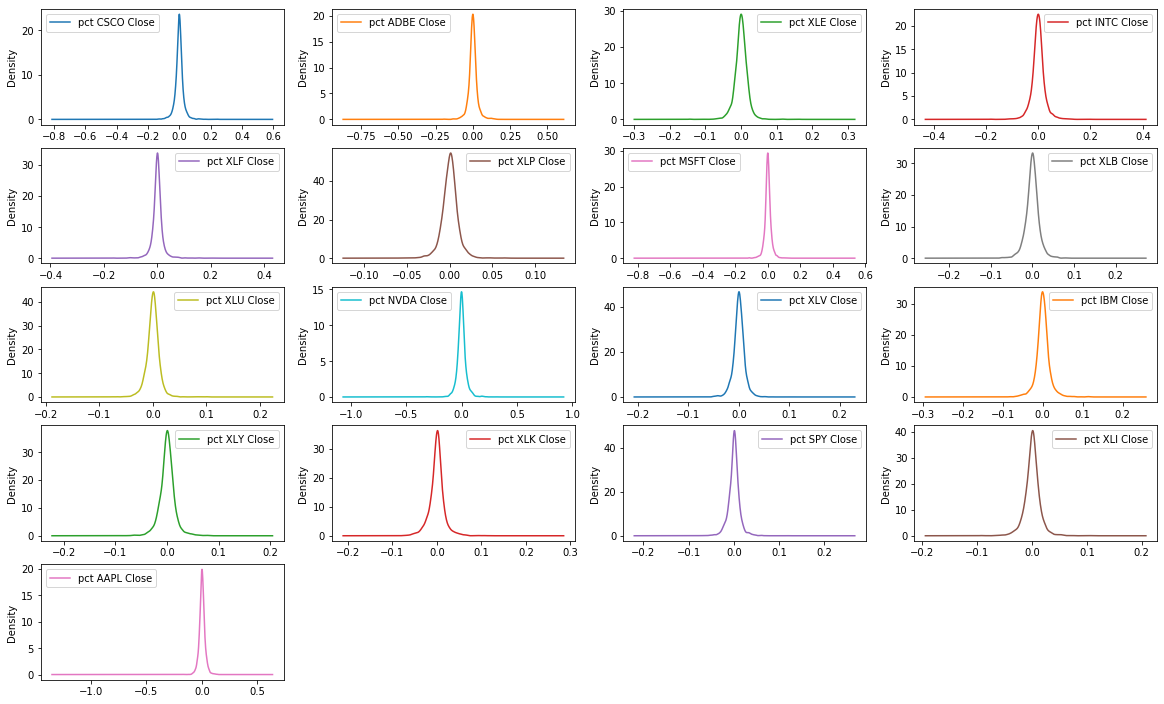

In [1026]:
comp_list = easyAccess.printAll()
comp_exclude = ['XLRE', 'FB', 'GOOG', 'V', 'MA', 'ACN', 'CRM']
comp_list = [x for x in comp_list if x not in comp_exclude]
_ = VisualEDA.DesBoxplot(X_train[ColSelector(var_ls=['Close'], series=['pct'], comp_list=comp_list)])

From the distribution plots, we can conclude that the stock returns are mostly centered around 0. The distribution is spiked and some of them skew to the left. As for the distribution of AAPL's stock return, it is especially concentrated around 0. The shape of its distribution is most similar to that of Microsoft and Cisco. This observation is quite interesting. Because it makes sense as these three companies all focus on technology and semiconduct products.  

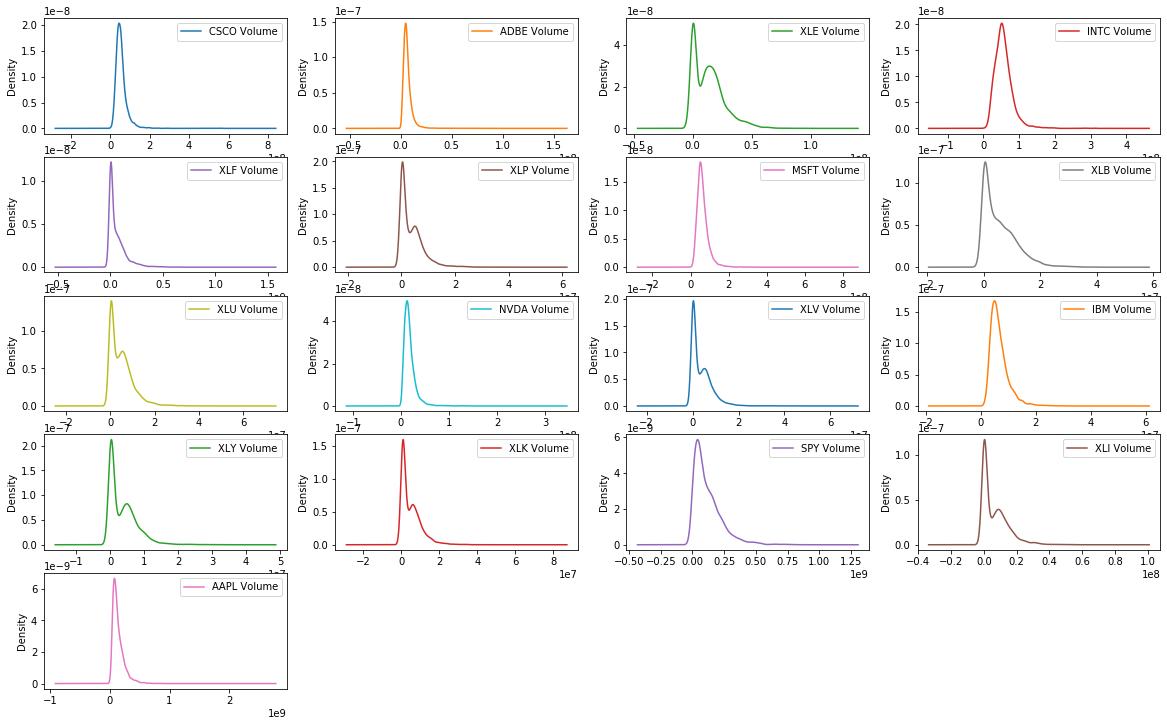

In [1027]:
_ = VisualEDA.DesBoxplot(X_train[ColSelector(var_ls=['Volume', ], series=[''], comp_list=comp_list)])

As for the distributions of volume, they are skewed to the right. Irregularilly high volume might indicate certain pattern in stock price. 

### Trend between X and Y
Below, I plot the return rate of MSFT, CSCO's stock return rate with AAPL's return rate and Y value. As designed, Y is one day ahead of AAPL's return rate.

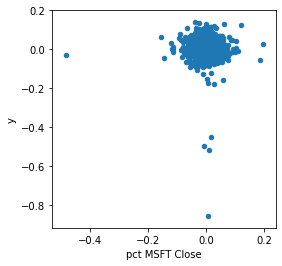

In [1028]:
_ = VisualEDA.PlotTrend(X_train[ColSelector(var_ls=['Close'], series=['pct'], 
                                            comp_list=['MSFT'])], 
                        Y_train)

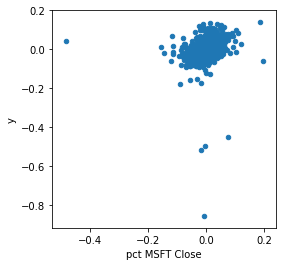

In [1029]:
_ = VisualEDA.PlotTrend(X_train[ColSelector(var_ls=['Close'], series=['pct'], 
                                            comp_list=['MSFT'])], 
                        X_train['pct AAPL Close'])

The first graph shows the relationship between MSFT's close return and the next day's AAPL return rate. There is no clear pattern between the two variables. Intuitively, it is reasonable or else everyone can make money by observing yesterday's stock return.

However, the second graph indicates a close relationship between MSFT's close return and that day AAPL's return rate. They are positive correlated. 

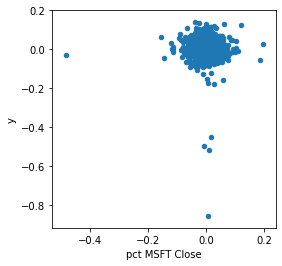

In [1030]:
_ = VisualEDA.PlotTrend(X_train[ColSelector(var_ls=['Close'], series=['pct'], 
                                            comp_list=['MSFT'])], 
                        Y_train)

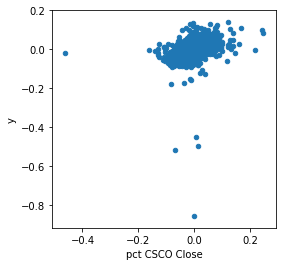

In [1031]:
_ = VisualEDA.PlotTrend(X_train[ColSelector(var_ls=['Close'], series=['pct'], 
                                            comp_list=['CSCO'])], 
                        X_train['pct AAPL Close'])

Likewise, the graphes with CSCO show a similar pattern. The first graph shows the relationship between CSCO's close return and the next day's AAPL return rate. There is no strong relationship.
The second graph shows the relationship between CSCO's close return and today's AAPL return rate. They seem to be positive correlated.

So fundamentally, it's quite difficult to predict next day's stock price. Hopefully, we can get more hidden pattern in stock price prediction using deep learning methods. 

### Missing data situation
Firstly, let's examine the missing data situation and decide on how to treat missing data. In this part, I call ``VisualEDA``'s CountNa and ReportNa functions. 

56 out of all variables have NaN.
5 variables with the most NaN:

 XLRE High         3848
XLRE Div          3848
XLRE Open         3848
XLRE Close        3848
XLRE Adj Close    3848
dtype: int64


V Adj Close       2062
ACN Adj Close      388
FB Adj Close      3113
GOOG Adj Close    1161
XLRE Adj Close    3848
MA Adj Close      1606
CRM Adj Close     1121
V Close           2062
ACN Close          388
FB Close          3113
GOOG Close        1161
XLRE Close        3848
MA Close          1606
CRM Close         1121
V Div             2062
ACN Div            388
FB Div            3113
GOOG Div          1161
XLRE Div          3848
MA Div            1606
CRM Div           1121
V Factor          2062
ACN Factor         388
FB Factor         3113
GOOG Factor       1161
XLRE Factor       3848
MA Factor         1606
CRM Factor        1121
V High            2062
ACN High           388
FB High           3113
GOOG High         1161
XLRE High         3848
MA High           1606
CRM High          1121
V Low             2062
ACN Low            388
FB Low            3113
GOOG Low          1161
XLRE Low          3848
MA Low            1606
CRM Low           1121
V Open            2062
ACN Open   

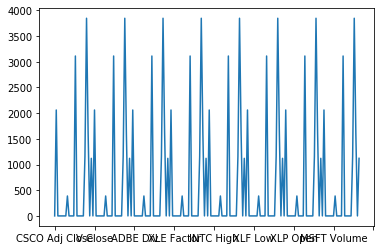

In [1032]:
cnt_na = VisualEDA.CountNa(X_train[ColSelector(var_ls=['Adj Close', 'Close', 'Div', 'Factor', 
                                                       'High', 'Low', 'Open', 'Volume'], series=[''])])
_ = VisualEDA.ReportNa(cnt_na)
cnt_na[cnt_na > 0]

The missing values concentrate in the company list that we intention to exclude. Especially, for XLRE, this company has no data in the training set. Let's have a look at what happens if we exclude these companies. 

0 out of all variables have NaN.
5 variables with the most NaN:

 CSCO Adj Close    0
XLU Low           0
XLE Low           0
INTC Low          0
XLF Low           0
dtype: int64


Series([], dtype: int64)

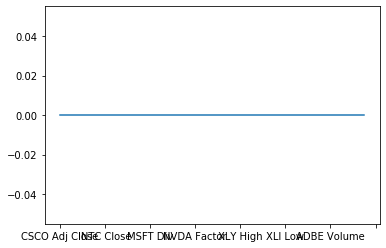

In [1033]:
cnt_na = VisualEDA.CountNa(X_train[ColSelector(var_ls=['Adj Close', 'Close', 'Div', 'Factor', 
                                                       'High', 'Low', 'Open', 'Volume'], series=[''], comp_list=comp_list)])
_ = VisualEDA.ReportNa(cnt_na)
cnt_na[cnt_na > 0]

After excluding the companies, no NaN exists in our train data. This means the rest of the companies don't have any missing data. We are safe to use the rest of it. After that, let's have a look at the percentage rate data. 

17 out of all variables have NaN.
5 variables with the most NaN:

 pct NVDA Div    3828
pct AAPL Div    3826
pct CSCO Div    3814
pct ADBE Div    3806
pct XLK Div     3772
dtype: int64


pct CSCO Div    3814
pct ADBE Div    3806
pct XLE Div     3726
pct INTC Div    3726
pct XLF Div     3726
pct XLP Div     3726
pct MSFT Div    3758
pct XLB Div     3726
pct XLU Div     3725
pct NVDA Div    3828
pct XLV Div     3732
pct IBM Div     3726
pct XLY Div     3726
pct XLK Div     3772
pct SPY Div     3724
pct XLI Div     3728
pct AAPL Div    3826
dtype: int64

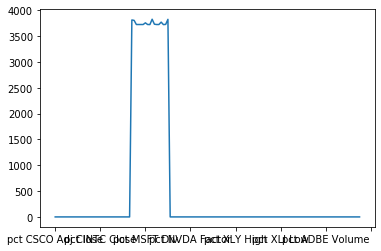

In [1034]:
cnt_na = VisualEDA.CountNa(X_train[ColSelector(var_ls=['Adj Close', 'Close', 'Div', 'Factor', 
                                                       'High', 'Low', 'Open', 'Volume'], series=['pct'], comp_list=comp_list)])
_ = VisualEDA.ReportNa(cnt_na)
cnt_na[cnt_na > 0]

For percentage data, all of the NaN values exist in dividend growth rate. It's reasonable as most of the dividend data is 0, which leads to many NaN when divided by 0. If I change it to be the ratio between dividend and stock price, it should not be a problem any more.

### Outlier visulization
Since adjusted close, open, high, low highly correlate with close price, I only discuss the outlier situation in close price return rate, volume percentage change, volumn level data. Here, I call ``VisualEDA``'s OutlierPlot and OutlierPercentage functions.

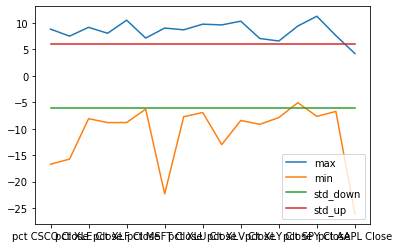

In [1035]:
_ = VisualEDA.OutlierPlot(X_train[ColSelector(var_ls=['Close'], series=['pct'], comp_list=comp_list)], 
                          n_std=6)

Highest outlier percentage defined by >= 6 std is  0.0036.
Lowest outlier percentage defined by >= 6 std is  0.0008.

5 variables with largest percentage of outliers:

pct XLF Close     0.003638
pct NVDA Close    0.002859
pct XLU Close     0.002599
pct XLE Close     0.002339
pct IBM Close     0.001559
dtype: float64


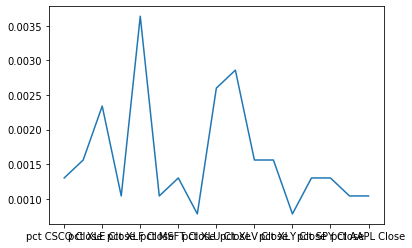

In [1036]:
_ = VisualEDA.OutlierPercentage(X_train[ColSelector(var_ls=['Close'], series=['pct'], comp_list=comp_list)], 
                                n_std=6)

In the above two graphes, the first one give a 6-std band. An unexpected finding is that for return rate, downside return has outliers farther than upside return, which indicates that return rate is downward skewed. When we implement winsorization, attention must be paid to the downside returns. For downside outliers, it can be extended to as far as 25 std. For upside outliers, it only expands to 10 std. 

The second graph shows the amount of outliers within an outlier band of 6 std. Overall, the percentage of outlier is under control. XLF has highest percentage of outliers at a rate of 0.36%. 

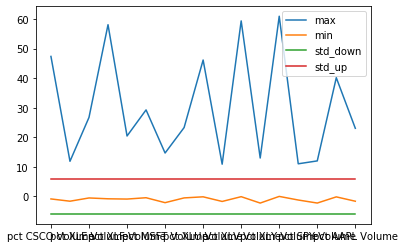

In [1037]:
_ = VisualEDA.OutlierPlot(X_train[ColSelector(var_ls=['Volume'], series=['pct'], comp_list=comp_list)], 
                          n_std=6)

Highest outlier percentage defined by >= 6 std is  0.0049.
Lowest outlier percentage defined by >= 6 std is  0.0003.

5 variables with largest percentage of outliers:

pct XLE Volume    0.004938
pct XLF Volume    0.004418
pct XLB Volume    0.003898
pct XLK Volume    0.003898
pct XLP Volume    0.003378
dtype: float64


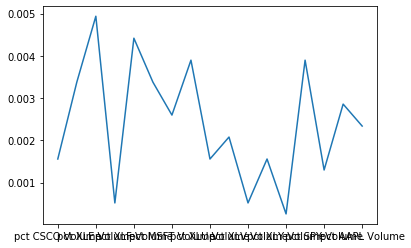

In [1038]:
_ = VisualEDA.OutlierPercentage(X_train[ColSelector(var_ls=['Volume'], series=['pct'], comp_list=comp_list)], 
                                n_std=6)

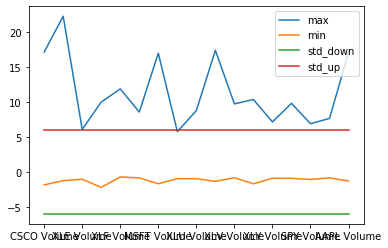

In [1039]:
_ = VisualEDA.OutlierPlot(X_train[ColSelector(var_ls=['Volume'], series=[''], comp_list=comp_list)], 
                          n_std=6)

Highest outlier percentage defined by >= 6 std is  0.0031.
Lowest outlier percentage defined by >= 6 std is  0.0000.

5 variables with largest percentage of outliers:

ADBE Volume    0.003119
NVDA Volume    0.002859
CSCO Volume    0.002339
XLV Volume     0.002339
MSFT Volume    0.002339
dtype: float64


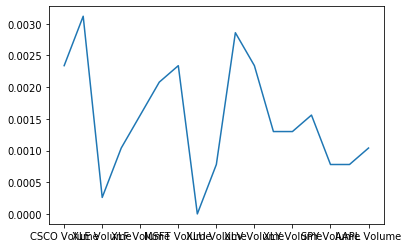

In [1040]:
_ = VisualEDA.OutlierPercentage(X_train[ColSelector(var_ls=['Volume'], series=[''], comp_list=comp_list)], 
                                n_std=6)

Comparatively, volume data has more outlier than return data. The percentage of outliers is still under control, volume percentage change's ourlier percentage being lower than 0.49%, volume level's outlier percentage being lower than 0.31%. Extreme value in volume change can be as great as 60 std. It might be caused by some extreme events which might help predict AAPL's future stock price and potential market risks. The volume can also strech as far as 20 std. 

### Correlation analysis

With so many variables at hand, I give a correlation matrix only including volume percentage change and close return rate. Because of the problem of serial correlation, it makes no sense to give a correlation matrix about level data. 

In [1041]:
corr_mat = VisualEDA.CorrelationShow(X_train[ColSelector(var_ls=['Close', 'Volume'], 
                                                    series=['pct'], comp_list=comp_list)])


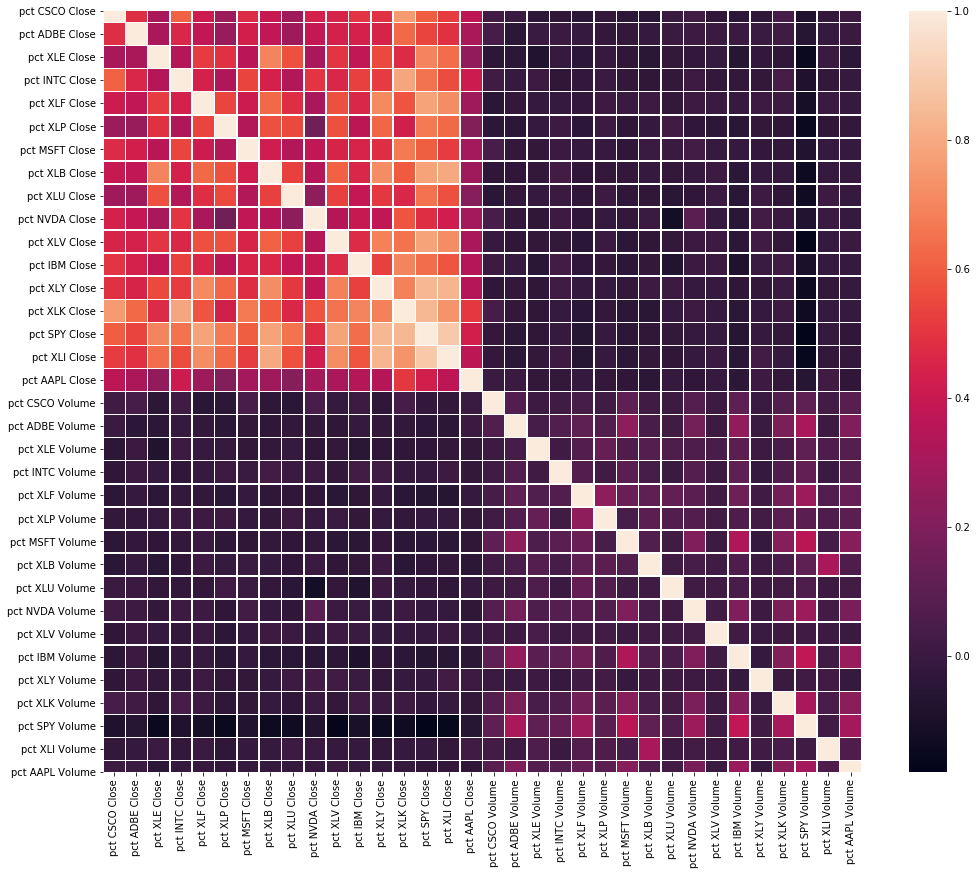

In [1042]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(17, 14))  
_ = sns.heatmap(corr_mat, linewidth=0.5, ax=ax)

# _ = plt.imshow(corr_mat, cmap='hot', interpolation='nearest')

In [1043]:
corr_mat['pct AAPL Close'].sort_values(ascending=False)

pct AAPL Close     1.00
pct XLK Close      0.51
pct SPY Close      0.43
pct INTC Close     0.41
pct CSCO Close     0.37
pct XLI Close      0.37
pct XLY Close      0.35
pct IBM Close      0.35
pct ADBE Close     0.32
pct XLV Close      0.31
pct NVDA Close     0.30
pct MSFT Close     0.30
pct XLB Close      0.29
pct XLF Close      0.29
pct XLE Close      0.25
pct XLU Close      0.22
pct XLP Close      0.21
pct XLI Volume     0.02
pct XLY Volume     0.01
pct CSCO Volume    0.00
pct ADBE Volume    0.00
pct XLF Volume    -0.01
pct XLU Volume    -0.01
pct XLV Volume    -0.01
pct INTC Volume   -0.02
pct XLP Volume    -0.02
pct XLE Volume    -0.02
pct XLK Volume    -0.02
pct MSFT Volume   -0.03
pct NVDA Volume   -0.03
pct AAPL Volume   -0.03
pct XLB Volume    -0.04
pct IBM Volume    -0.04
pct SPY Volume    -0.06
Name: pct AAPL Close, dtype: float64

From the graph, one can conclude that AAPL's close price return rate has positive correlation with other companies' return rate but is slightly negatively correlated with volume percentage change. To my surprise, AAPL's stock return is even slightly negatively correlated with the percentage change of the trading volume of itself. 

Assets that correlate most with AAPL's stock return are XLK (Technology Select Sector SPDR Fund), SP 500, INTL (Intel). This is strikingly interesting. For XLK, AAPL is a company in the technology sector. FOr SP 500, AAPL is a company with large market cap. For Intel, AAPL is its customer and their revenue must be highly correlated. Special attention must be paid to these three companies (assets) and dig their potentiality in making prediction about AAPL's stock return. 

# *Model 1* design
This is the very first model. So I intend to use it as a benchmark. 

Details for *model 1*:
- Model: Simple Neural Network.
- Data: cross-sectional data from companies without NaN
- Features: percentage close return rate, volume percentage change.

## Data fetch
For simple neural network models, a ``raw_data_model_#`` function will be created. This function selects required columns needed in this part. Useing a function to generate required data makes it possible to generate identical columns for no matter training data, cv data or test data. This design ensures a consistent treatment. Getting data and preprocessing will be further wrapped into a more sophisticated function. 

```{note}
I decide to take a more parsimonious routine when dealing with the data, by iterating ``Get the Data`` process. Another option is to get the data only once and get rid of the data used for lagging variables between training set and testing set. Considering we are using a daily-frequent data, it's better to be parsimonious and worthy of using more complicated pipelines to give identical treatment for all three data sets. Though this routine makes it more easier to leak future data, I prudently process the data to ensure no data leakage. 
```

In [1044]:
def raw_data_model_1(X_data):
    comp_list = ['CSCO', 'ADBE', 'XLE', 'INTC', 'XLF', 
             'XLP', 'MSFT', 'XLB', 'XLU', 'NVDA', 
             'XLV', 'IBM', 'XLY', 'XLK', 'SPY', 'XLI', 'AAPL']
    serial = ['pct']
    var_ls = ['Close', 'Volume']
    return X_data[ColSelector(comp_list=comp_list, series=serial, var_ls=var_ls)]
raw_data_model_1(X_train).columns

Index(['pct CSCO Close', 'pct ADBE Close', 'pct XLE Close', 'pct INTC Close',
       'pct XLF Close', 'pct XLP Close', 'pct MSFT Close', 'pct XLB Close',
       'pct XLU Close', 'pct NVDA Close', 'pct XLV Close', 'pct IBM Close',
       'pct XLY Close', 'pct XLK Close', 'pct SPY Close', 'pct XLI Close',
       'pct AAPL Close', 'pct CSCO Volume', 'pct ADBE Volume',
       'pct XLE Volume', 'pct INTC Volume', 'pct XLF Volume', 'pct XLP Volume',
       'pct MSFT Volume', 'pct XLB Volume', 'pct XLU Volume',
       'pct NVDA Volume', 'pct XLV Volume', 'pct IBM Volume', 'pct XLY Volume',
       'pct XLK Volume', 'pct SPY Volume', 'pct XLI Volume',
       'pct AAPL Volume'],
      dtype='object')

The above columns are what we use in model 1. 

# For *Model 1* Usage - Prepare the Data
## Cleaning
As shown in EDA - Visulization, no NaN exists in model 1's raw data. So we can skip this step for now. 

## Handle non-numeric attributes
All of the attributes are already in numeric form. No need to implement this step. So I skip for now. 

## Transformation
As analyzed in EDA, we need to handle the problem of outlier. After this winsorization process, the data will not exceed 1% and 99% percentile. To ensure no data leakage, I need to wrap it into a scikit-learn pipeline. 

In [1045]:
from sklearn.base import BaseEstimator, TransformerMixin
class Winsor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        X_new = pd.DataFrame(np.array(X).copy())
        self.High = []
        self.Low = []
        for col in X_new.columns:
            self.High.append(X_new[col].quantile(0.9))
            self.Low.append(X_new[col].quantile(0.1))
        return self

    def transform(self, X, y=None):
        X_new = pd.DataFrame(np.array(X).copy())
        for i, col in enumerate(X_new.columns):
            high = self.High[i]
            low = self.Low[i]
            X_new.loc[X_new[col] > high, col] = high
            X_new.loc[X_new[col] < low, col] = low
        return X_new.values

## Scaling
I will use sklearn's StandardScaler to scale the data. 

In [1046]:
from sklearn.preprocessing import StandardScaler

## Preparation wrapping up - *Model 1*

Now, I wrap cleaning, numeric handling, transformation, scaling into a single preprocess pipeline for *Model 1*, ``Pipe_model_1``.

In [1047]:
from sklearn.pipeline import Pipeline
def Pipe_model_1():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

### Template - ``GeneralPrepare``
Now, let me introducing the next tool, ``GeneralPrepare``.

This tool takes in original training dataset, test dataset, data selection function, pipeline generating function, and output processed training data and test data. After processed by this function, you can directly put this data into next stage -- model training, without need to worry about data leakage problem. Additionally, if an address is transferred in, the fitted pipe and the raw data function will be saved to that address using pickle.  

In [1048]:
import pickle

def GeneralPrepare(X_train, X_test, raw_data_func, pipe_func, pipe_address=None):
    if raw_data_func:
        X_train = raw_data_func(X_train)
        X_test = raw_data_func(X_test)
    pip = pipe_func()
    X_train_processed = pip.fit_transform(X_train)
    X_test_processed = pip.transform(X_test)
    if pipe_address:
        with open(pipe_address+'_pipeline.pkl','wb') as f:
            pickle.dump(pip,f)
        with open(pipe_address+'_raw_func.pkl','wb') as f:
            pickle.dump(raw_data_func,f)
    return X_train_processed, X_test_processed

```{note}
The key in the above pipeline is the different treatment of ``fit_transform`` and ``transform``, which is expecially important to prevent data leakage. 
```

In preparing *Model 1*'s data, we can simply achieve that by calling ``GeneralPrepare``.

In [1049]:
X_train_model_1, X_cv_model_1 = GeneralPrepare(X_train1, X_cv, raw_data_model_1, Pipe_model_1, "./models/model_1/model_1")
X_train_model_1.shape, X_cv_model_1.shape

((3421, 34), (427, 34))

In [1050]:
print("Before GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train1.iloc[:, 0].max(), X_train1.iloc[:, 0].min()))
print("After GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model_1[:, 0].max(), X_train_model_1[:, 0].min()))
print("Before GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv.iloc[:, 0].max(), X_cv.iloc[:, 0].min()))
print("After GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model_1[:, 0].max(), X_cv_model_1[:, 0].min()))

Before GeneralPrepare, X_train max value of the first col is 62.43, the min value is 6.71.
After GeneralPrepare, X_train max value of the first col is 1.64, the min value is -1.66.
Before GeneralPrepare, X_cv max value of the first col is 25.97, the min value is 16.76.
After GeneralPrepare, X_cv max value of the first col is 1.64, the min value is -1.66.


We can conclude that both training data and cross validation has been successfully converted. Besides, the pipeline and the function has been saved to pickle files. 

# For *Model 1* Usage - Train a Model
## Select a model, fit, and cross validation
As a result of the struction of Keras, I decide the workflow of this part should be an integration of model selection, fit and cross validation. To achieve this, I utilize Keras tuner to select the best parameter for simple neural network model. 

The parameters for choice include:
- units in each dense layer
- dropout percentage
- number of layer. 

The model takes a form of **Input** -> ( **Dense** -> **Dropout** ) x n -> **Output**. In this process, I use hyperparameter tuning to find the node number in each layer and the number of layers. Hence, the model with the highest cross validation mean squared error is the model with the most suitable structure for this problem. 

In [1051]:
def acc_key(history=None, model=None):
    key_name = None
    if model is not None:
      key_name = "accuracy" if "accuracy" in model.metrics_names else "acc"
    else:
      key_name = "accuracy" if "accuracy" in history.history.keys() else "acc"
    return key_name

def plotTrain(history, model_name="???"):
    fig, axs = plt.subplots(figsize=(10, 8) )

    # Determine the name of the key that indexes into the accuracy metric
    acc_string = acc_key(history=history)
    
    # Plot loss
    axs.plot(history.history['loss'])
    axs.plot(history.history['val_loss'])
    axs.set_title(model_name + " " + 'model loss')
    axs.set_ylabel('loss')
    axs.set_xlabel('epoch')
    axs.legend(['train', 'validation'], loc='upper left')

    return fig, axs

**Hyperparameter Tuning**
The code chunk below is the process to pick the best model for *model 1*

In [1052]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def simpleNN(units, nlayer, dropout):
    model = keras.Sequential()
    for i in range(nlayer):
        model.add(layers.Dense(units=units, activation='relu'))
        model.add(layers.Dropout(rate=dropout))
    model.add(layers.Dense(1 ,activation = "linear"))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    units = hp.Int('units', min_value=8, max_value=32, step=8)
    nlayer = hp.Int('nlayer', min_value=2, max_value=4, step=1)
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.3, step=0.05)
    model = simpleNN(units=units, nlayer=nlayer, dropout=dropout)
    return model

callback_1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='./hist/dir1',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_model_1, Y_train1, epochs=10, validation_data=(X_cv_model_1, Y_cv), callbacks=[callback_1], shuffle=False)

Trial 43 Complete [00h 00m 02s]
val_loss: 0.0019518169574439526

Best val_loss So Far: 0.001918888883665204
Total elapsed time: 00h 01m 44s
INFO:tensorflow:Oracle triggered exit


In [1053]:
print(tuner.results_summary())
model_1_best_params = tuner.get_best_hyperparameters()[0]
model_1 = build_model(model_1_best_params)
model_1.build(input_shape=(None, X_train_model_1.shape[1]))

Results summary
Results in ./hist/dir1/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 32
nlayer: 4
dropout: 0.15000000000000002
Score: 0.001918888883665204
Trial summary
Hyperparameters:
units: 32
nlayer: 4
dropout: 0.3
Score: 0.0019228579476475716
Trial summary
Hyperparameters:
units: 8
nlayer: 3
dropout: 0.25
Score: 0.0019235374638810754
Trial summary
Hyperparameters:
units: 24
nlayer: 4
dropout: 0.1
Score: 0.0019272950012236834
Trial summary
Hyperparameters:
units: 16
nlayer: 4
dropout: 0.25
Score: 0.0019289676565676928
Trial summary
Hyperparameters:
units: 24
nlayer: 3
dropout: 0.3
Score: 0.0019321071449667215
Trial summary
Hyperparameters:
units: 8
nlayer: 4
dropout: 0.3
Score: 0.0019327772315591574
Trial summary
Hyperparameters:
units: 16
nlayer: 4
dropout: 0.15000000000000002
Score: 0.0019344117026776075
Trial summary
Hyperparameters:
units: 32
nlayer: 3
dropout: 0.25
Score: 0.0019420537864789367
Trial su

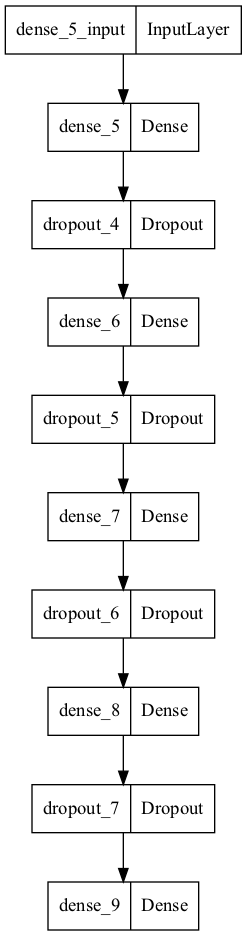

In [1054]:
keras.utils.plot_model(model_1)

In [1055]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                1120      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [1056]:
hist_model_1 = model_1.fit(X_train_model_1, Y_train1, epochs=10, validation_data=(X_cv_model_1, Y_cv), callbacks=[callback_1], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
101/107 [===========================>..] - ETA: 0s - loss: 0.0181 - asset_return: 0.0035 - mse: 0.0181 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe437fca050> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAP

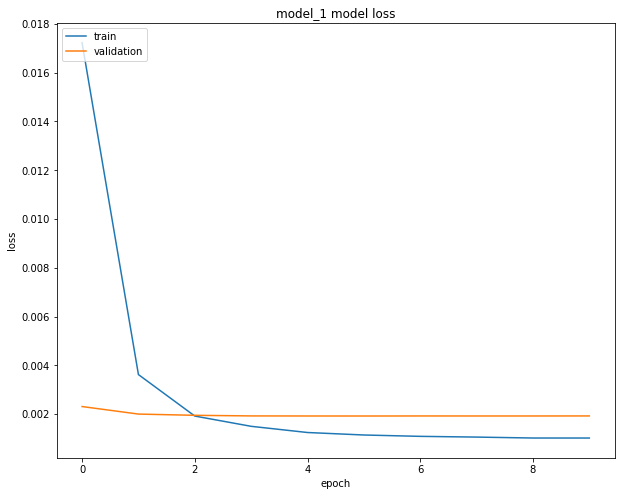

In [1057]:
_ = plotTrain(hist_model_1, "model_1")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1058]:
print("The number of weights in this model is {}.".format(model_1.count_params()))

The number of weights in this model is 4321.


In [1059]:
results = []
results.append(['model_1'] + model_1.evaluate(X_train_model_1, Y_train1)[:2])
in_sample_pred = model_1.predict(X_train_model_1)
len(in_sample_pred)
results

107/107 [==============================] - 0s 777us/step - loss: 9.6141e-04 - asset_return: 0.0366 - mse: 9.6141e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[['model_1', 0.0009614064474590123, 0.03664696589112282]]

In [1060]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_1 model" has in-sample MSE 0.000961, 
whole-period compounded return rate 0.0366.


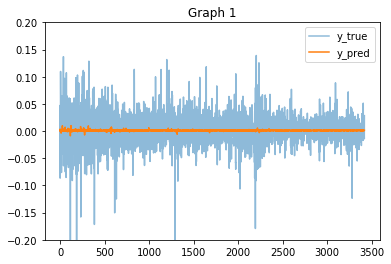

In [1061]:
plt.plot(np.array(Y_train1), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

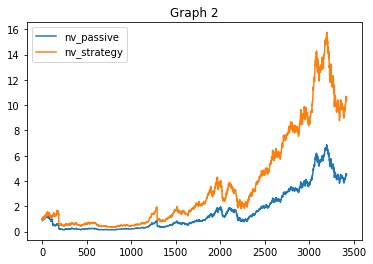

In [1062]:
nv = net_value(np.array(Y_train1).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train1) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1063]:

results[-1].extend(model_1.evaluate(X_cv_model_1, Y_cv)[:2])
out_sample_pred = model_1.predict(X_cv_model_1)
len(out_sample_pred)
results

14/14 [==============================] - 0s 779us/step - loss: 0.0019 - asset_return: -0.0143 - mse: 0.0019 


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238]]

In [1064]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_1 model" has out-sample MSE 0.001924, 
whole-period compounded return rate -0.0143.


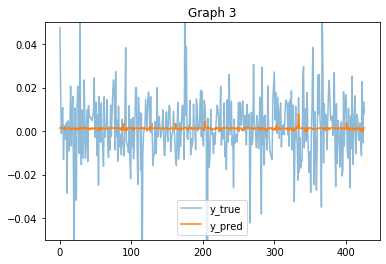

In [1065]:
plt.plot(np.array(Y_cv), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

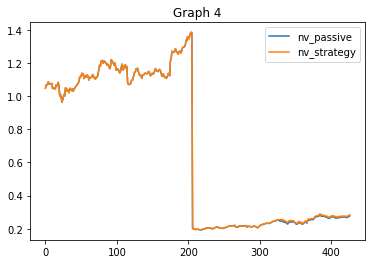

In [1066]:
nv = net_value(np.array(Y_cv).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

### Conclusion
From the graphs and data above, we can come to the following observations:
- In-sample performance is better than out-sample performance as indicated by MSE level. In-sample MSE is almost half the amount of out-sample MSE. However, the  out-sample MSE is still acceptable. 
- The comparing graph between true value and predicted value shows that the model can capture some of the surge and down movements. But the model has difficulty in reaching a volatility level as high as the original data, by graph 3 and graph 1.
- Using the simple strategy, the model can not gain outperformance comparing with holding-all-the-time strategy. 
- The predicted value in out-sample set has little variation and cannot produce adequate signal to prevent large market drawdown events. 

To improve on this, I will implement feature engineering further and add more features to model 2, hoping to reduce volatility and improve return. 

# *Model 2* design
Based on the previous model, in this model, I will focus on add more features produced by our existing data so as to improve return and reduce volatility.

Details for *model 2*:
- Model: Simple Neural Network.
- Data: cross-sectional data from companies without NaN
- Features: percentage close return rate, volume percentage change, intraday volatility, dividend rate, Factor, ratios.

## Data fetch
**Intraday Volatility**
A great improvement in this model is the joining of Intraday volatility. Compared with historical volatility, intraday volatility is more agile and has greater reaction within a smaller time period. This can be very useful in predicting extreme events.

**Dividend Rate**
Because divident rate remains 0 for a long period, it's impractical to include dividend percentage change. To reflect the extend to which each company give divident, I calculate dividend rate.

**Level Data**
Instead of including merely percentage change data, I also include level data. Let's explore how the new dataset will perform. 

**Ratios**
To reflect the market's up and down situation, I calculate the following ratios: high/close, low/close, open/close. 

In [1067]:
import math

def raw_data_model_2(X_data):
    comp_list = ['CSCO', 'ADBE', 'XLE', 'INTC', 'XLF', 
             'XLP', 'MSFT', 'XLB', 'XLU', 'NVDA', 
             'XLV', 'IBM', 'XLY', 'XLK', 'SPY', 'XLI', 'AAPL']
    var1_ls = ColSelector(comp_list=comp_list, series=['pct'], var_ls=['Close', 'Volume'])
    var2_ls = ColSelector(comp_list=comp_list, series=[''], var_ls=['Close', 'Open', 'High', 'Low', 'Volume', 'Div', 'Factor'])
    X_train = X_data[var1_ls + var2_ls]
    """
    Calculate Intraday Volatility
    """
    for comp in comp_list:
        r1 = np.array(X_train[comp+' High'] / X_train[comp+' Low'])
        r2 = np.array(X_train[comp+' Close'] / X_train[comp+' Open'])
        X_train[comp+' Vohlc'] = np.power(0.5 * np.power(np.log(r1), 2) - (2*math.log(2) - 1) * np.power(np.log(r2), 2), 0.5)
    """
    Calculate Dividend Rate and Ratios
    """
    for comp in comp_list:
        X_train[comp+' Div'] = X_train[comp+' Div'] / X_train[comp+' Close']
        X_train[comp+' O/C'] = X_train[comp+' Open'] / X_train[comp+' Close']
        X_train[comp+' H/C'] = X_train[comp+' High'] / X_train[comp+' Close']
        X_train[comp+' L/C'] = X_train[comp+' Low'] / X_train[comp+' Close']
    X_train.drop(ColSelector(comp_list=comp_list, series=[''], var_ls=['Close', 'Open', 'High', 'Low', 'Volume']), axis=1, inplace=True)
    return X_train
X_model_2 = raw_data_model_2(X_train)
X_model_2.columns

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Index(['pct CSCO Close', 'pct ADBE Close', 'pct XLE Close', 'pct INTC Close',
       'pct XLF Close', 'pct XLP Close', 'pct MSFT Close', 'pct XLB Close',
       'pct XLU Close', 'pct NVDA Close',
       ...
       'XLK L/C', 'SPY O/C', 'SPY H/C', 'SPY L/C', 'XLI O/C', 'XLI H/C',
       'XLI L/C', 'AAPL O/C', 'AAPL H/C', 'AAPL L/C'],
      dtype='object', length=136)

The above columns are what we use in model 2. 

# For Model 2 Usage - Exploratory Data Analysis
## Visualization
In this part, I iterate the process 10.1 for the newly added variables. 

In [1068]:
VisualEDA.DesTable(X_model_2[ColSelector(var_ls=['Vohlc', 'Div', 'Factor'], series=[''], comp_list=comp_list)])

,count,mean,std,min,25%,50%,75%,max
CSCO Vohlc,3848.0,1.802766e-02,0.012285,0.002076,0.010028,0.014324,0.022002,0.129520
ADBE Vohlc,3848.0,2.060489e-02,0.014512,0.003035,0.011481,0.016165,0.024566,0.171421
XLE Vohlc,3848.0,1.232423e-02,0.008537,0.002406,0.007657,0.010368,0.014282,0.138260
INTC Vohlc,3848.0,1.737930e-02,0.010624,0.002829,0.010207,0.014268,0.021062,0.083739
XLF Vohlc,3848.0,1.188481e-02,0.010336,0.001100,0.005891,0.008856,0.013871,0.118937
XLP Vohlc,3848.0,7.270299e-03,0.005245,0.000921,0.004340,0.005993,0.008575,0.077832
MSFT Vohlc,3848.0,1.406462e-02,0.008532,0.002951,0.008352,0.011581,0.017313,0.083295
XLB Vohlc,3848.0,1.128050e-02,0.007957,0.001921,0.006686,0.009367,0.013493,0.166271
XLU Vohlc,3848.0,9.451358e-03,0.006841,0.001854,0.005750,0.007767,0.010832,0.108517
NVDA Vohlc,3848.0,2.818161e-02,0.019370,0.004541,0.015859,0.023021,0.034086,0.263130


<u>All of the data are numerical. </u>

0 out of all variables have NaN.
5 variables with the most NaN:

 CSCO Vohlc    0
XLF Factor    0
IBM Div       0
XLY Div       0
XLK Div       0
dtype: int64


Series([], dtype: int64)

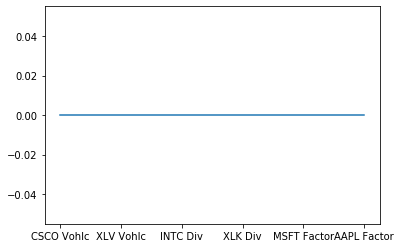

In [1069]:
cnt_na = VisualEDA.CountNa(X_model_2[ColSelector(var_ls=['Vohlc', 'Div', 'Factor'], series=[''], 
                                                 comp_list=comp_list)])
_ = VisualEDA.ReportNa(cnt_na)
cnt_na[cnt_na > 0]

<u>No NaN is found in the newly added variables. So we can skip the process of imputer.</u> 

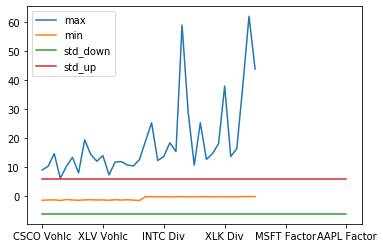

In [1070]:
_ = VisualEDA.OutlierPlot(X_model_2[ColSelector(var_ls=['Vohlc', 'Div', 'Factor'], series=[''], 
                                                 comp_list=comp_list)], 
                          n_std=6)

Highest outlier percentage defined by >= 6 std is  0.0153.
Lowest outlier percentage defined by >= 6 std is  0.0000.

5 variables with largest percentage of outliers:

XLU Div    0.015333
SPY Div    0.013254
XLE Div    0.012474
XLV Div    0.011954
XLP Div    0.010915
dtype: float64


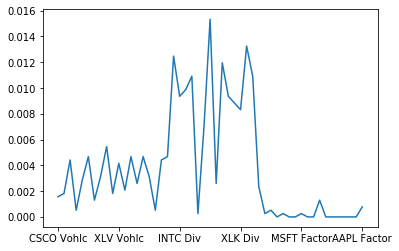

In [1071]:
_ = VisualEDA.OutlierPercentage(X_model_2[ColSelector(var_ls=['Vohlc', 'Div', 'Factor'], series=[''], 
                                                 comp_list=comp_list)], 
                                n_std=6)

<u>Outlier is a serious issue for dividend data. So it's vital to use winsorization to treat this issue. </u>

# For *Model 2* Usage - Prepare the Data
## Cleaning
As shown in EDA - Visulization, no NaN exists in model 2's raw data. So we can skip this step for now. 

## Handle non-numeric attributes
All of the attributes are already in numeric form. No need to implement this step. So I skip for now. 

## Transformation
As analyzed in EDA, we need to handle the problem of outlier. After this winsorization process, the data will not exceed 1% and 99% percentile. To ensure no data leakage, I need to wrap it into a scikit-learn pipeline. 

## Scaling
I will use sklearn's StandardScaler to scale the data. 

## Preparation wrapping up - *Model 2*

Now, I wrap cleaning, numeric handling, transformation, scaling into a single preprocess pipeline for *Model 2*, ``Pipe_model_2``.

In [1072]:
def Pipe_model_2():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

In preparing *Model 2*'s data, we can simply achieve that by calling ``GeneralPrepare``.

In [1073]:
X_train_model_2, X_cv_model_2 = GeneralPrepare(X_train1, X_cv, raw_data_model_2, Pipe_model_2, "./models/model_2/model_2")
X_train_model_2.shape, X_cv_model_2.shape

/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/louxiao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

((3421, 136), (427, 136))

In [1074]:
print("Before GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_model_2.iloc[:, 0].max(), X_model_2.iloc[:, 0].min()))
print("After GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model_2[:, 0].max(), X_train_model_2[:, 0].min()))
print("Before GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_model_2.iloc[:, 0].max(), X_model_2.iloc[:, 0].min()))
print("After GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model_2[:, 0].max(), X_cv_model_2[:, 0].min()))

Before GeneralPrepare, X_train max value of the first col is 0.24, the min value is -0.46.
After GeneralPrepare, X_train max value of the first col is 1.64, the min value is -1.66.
Before GeneralPrepare, X_cv max value of the first col is 0.24, the min value is -0.46.
After GeneralPrepare, X_cv max value of the first col is 1.64, the min value is -1.66.


We can conclude that both training data and cross validation has been successfully converted. Besides, the pipeline and the function has been saved to pickle files. 

# For *Model 2* Usage - Train a Model
## Select a model, fit, and cross validation
As a result of the struction of Keras, I decide the workflow of this part should be an integration of model selection, fit and cross validation. To achieve this, I utilize Keras tuner to select the best parameter for simple neural network model. 

The parameters for choice include:
- units in each dense layer
- dropout percentage
- number of layer. 

The model takes a form of **Input** -> ( **Dense** -> **Dropout** ) x n -> **Output**. In this process, I use hyperparameter tuning to find the node number in each layer and the number of layers. Hence, the model with the highest cross validation mean squared error is the model with the most suitable structure for this problem. 

**Hyperparameter Tuning**
The code chunk below is the process to pick the best model for *model 2*

In [1075]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def simpleNN(units, nlayer, dropout):
    model = keras.Sequential()
    for i in range(nlayer):
        model.add(layers.Dense(units=units, activation='relu'))
        model.add(layers.Dropout(rate=dropout))
    model.add(layers.Dense(1 ,activation = "linear"))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    units = hp.Int('units', min_value=16, max_value=128, step=8)
    nlayer = hp.Int('nlayer', min_value=2, max_value=4, step=1)
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.3, step=0.05)
    model = simpleNN(units=units, nlayer=nlayer, dropout=dropout)
    return model

callback_2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='./hist/dir2',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_model_2, Y_train1, epochs=10, validation_data=(X_cv_model_2, Y_cv), callbacks=[callback_2], shuffle=False)

Trial 60 Complete [00h 00m 02s]
val_loss: 0.0019180024974048138

Best val_loss So Far: 0.0019160039955750108
Total elapsed time: 00h 02m 30s
INFO:tensorflow:Oracle triggered exit


In [1076]:
print(tuner.results_summary())
model_2_best_params = tuner.get_best_hyperparameters()[0]
model_2 = build_model(model_2_best_params)
model_2.build(input_shape=(None, X_train_model_2.shape[1]))

Results summary
Results in ./hist/dir2/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
units: 80
nlayer: 3
dropout: 0.2
Score: 0.0019160039955750108
Trial summary
Hyperparameters:
units: 40
nlayer: 4
dropout: 0.2
Score: 0.0019174594199284911
Trial summary
Hyperparameters:
units: 48
nlayer: 3
dropout: 0.15000000000000002
Score: 0.0019180024974048138
Trial summary
Hyperparameters:
units: 112
nlayer: 3
dropout: 0.2
Score: 0.001919381320476532
Trial summary
Hyperparameters:
units: 112
nlayer: 3
dropout: 0.1
Score: 0.0019221724942326546
Trial summary
Hyperparameters:
units: 112
nlayer: 4
dropout: 0.15000000000000002
Score: 0.0019225642317906022
Trial summary
Hyperparameters:
units: 64
nlayer: 3
dropout: 0.25
Score: 0.0019229506142437458
Trial summary
Hyperparameters:
units: 128
nlayer: 4
dropout: 0.3
Score: 0.0019257860258221626
Trial summary
Hyperparameters:
units: 48
nlayer: 4
dropout: 0.15000000000000002
Score: 0.00192633

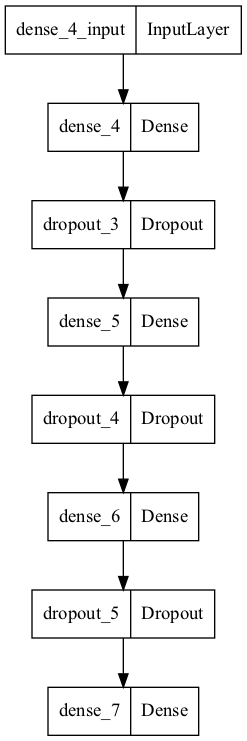

In [1077]:
keras.utils.plot_model(model_2)

In [1078]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                10960     
                                                                 
 dropout_3 (Dropout)         (None, 80)                0         
                                                                 
 dense_5 (Dense)             (None, 80)                6480      
                                                                 
 dropout_4 (Dropout)         (None, 80)                0         
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dropout_5 (Dropout)         (None, 80)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [1079]:
hist_model_2 = model_2.fit(X_train_model_2, Y_train1, epochs=10, validation_data=(X_cv_model_2, Y_cv), callbacks=[callback_2], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 91/107 [========================>.....] - ETA: 0s - loss: 0.0795 - asset_return: 0.0045 - mse: 0.0795 WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe437c81f80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAP

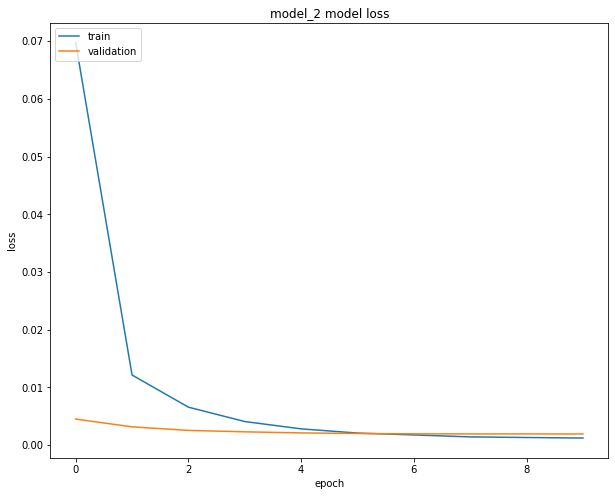

In [1080]:
_ = plotTrain(hist_model_2, "model_2")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1081]:
print("The number of weights in this model is {}.".format(model_2.count_params()))

The number of weights in this model is 24001.


In [1082]:
results.append(['model_2'] + model_2.evaluate(X_train_model_2, Y_train1)[:2])
in_sample_pred = model_2.predict(X_train_model_2)
len(in_sample_pred)

107/107 [==============================] - 0s 721us/step - loss: 9.5928e-04 - asset_return: 0.0439 - mse: 9.5928e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3421

In [1083]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_2 model" has in-sample MSE 0.000959, 
whole-period compounded return rate 0.0439.


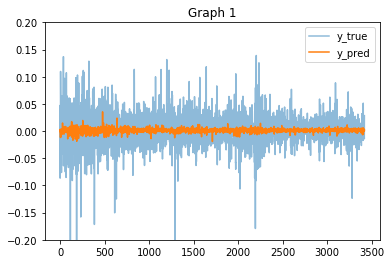

In [1084]:
plt.plot(np.array(Y_train1), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

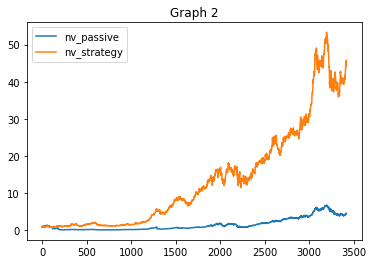

In [1085]:
nv = net_value(np.array(Y_train1).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train1) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1086]:
results[-1].extend(model_2.evaluate(X_cv_model_2, Y_cv)[:2])
out_sample_pred = model_2.predict(X_cv_model_2)
len(out_sample_pred)
results

14/14 [==============================] - 0s 767us/step - loss: 0.0019 - asset_return: -0.0335 - mse: 0.0019  


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081]]

In [1087]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_2 model" has out-sample MSE 0.001938, 
whole-period compounded return rate -0.0335.


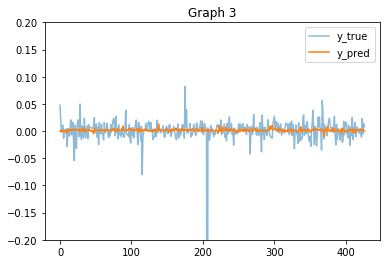

In [1088]:
plt.plot(np.array(Y_cv), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

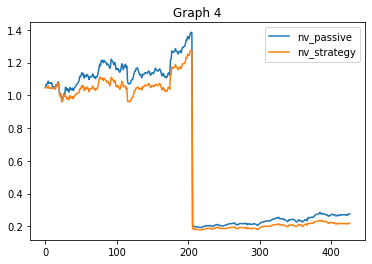

In [1089]:
nv = net_value(np.array(Y_cv).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

### Conclusion
Comparing with model 1, model 2 becomes more complex. The number of parameter increased by 50% to 6529. The result is satisfying. Both out-sample mse has reduced while out-sample mse increased. 

The in-sample model strategy far outperforms doing-nothing strategy. However, the out-sample performance always underperform doing-nothing strategy. 

How to further improve? I have these two thoughts:
- Stock prediction does not necessarily depend on pattern on the whole training period. Instead, they maybe rely on localized features. 
- Stock return is dependent on trend. So, model 1 and model 2's cross sectional data doesn't include stock price from previous time periods. Information on trend is missing. 

To improve on these problems, I will use features from past time periods and apply CNN model to capture localized patterns. 

# *Model 3* design
Based on the previous models, in this model, I will focus on add more features produced by our existing data, hoping to capture more out-sample extreme events/drawdowns.

Details for *model 3*:
- Model: Convolutional Neural Network.
- Data: data with lagged periods from companies without NaN
- Features: percentage close return rate.

## Data fetch
To add in a series of lagged variables, I create the following function to create training data with a structure *sample size* **x** *lag periods* **x** *channels*. For starters, model 3 has channel equal to company number as I consider each company's return rate data here. 

Because this has a completely different structure than the previous data, I need to go over the process of acquiring data and splitting test data again. 

In [1090]:
import math

def Generate3D(lag = 90, var_ls=['Close'], dir='./Data/train'):
    comp_list = ['CSCO', 'ADBE', 'XLE', 'INTC', 'XLF', 
                 'XLP', 'MSFT', 'XLB', 'XLU', 'NVDA', 
                 'XLV', 'IBM', 'XLY', 'XLK', 'SPY', 'XLI', 'AAPL']
    data = easyAccess.lsGetCompData(var_ls=var_ls, comp_ls=comp_list, data_path=dir).pct_change()
    data.columns = ['pct ' + x for x in data.columns]
    Y = data['pct AAPL Close'].shift(-1).iloc[:-1]
    data = data.iloc[:-1, :]
    X = []
    for col in data.columns:
        temp = data[[col]].copy()
        for i in range(1, lag+1):
            temp[str(i) + col] = temp[col].shift(i)
        temp.dropna(inplace=True)
        X.append(temp.values)
        Y = Y[temp.index]
        print(Y.shape)
    X = np.array(X)
    X = np.swapaxes(X, 0, 1)
    X = np.swapaxes(X, 1, 2)
    print(X.shape)
    return X, Y
X, Y = Generate3D()

Data acquisition completed! Close
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185, 91, 17)


## Create test set - *Model 3*

In [1091]:
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size=X.shape[0]//10, shuffle=False)
X_train_model3, X_cv_model3, Y_train_model3, Y_cv_model3 = train_test_split(X_train3, Y_train3, test_size=X.shape[0]//10, shuffle=False)

print("The shape of X_train", X_train_model3.shape)
print("The shape of X_cv", X_cv_model3.shape)
print("The shape of X_test", X_test3.shape)

The shape of X_train (3349, 91, 17)
The shape of X_cv (418, 91, 17)
The shape of X_test (418, 91, 17)


# For *Model 3* Usage - Prepare the Data
## Cleaning
No NaN exists in model 3's raw data. So we can skip this step for now. 

## Handle non-numeric attributes
All of the attributes are already in numeric form. No need to implement this step. So I skip for now. 

## Transformation
As analyzed in EDA, we need to handle the problem of outlier. After this winsorization process, the data will not exceed 1% and 99% percentile. To ensure no data leakage, I need to wrap it into a scikit-learn pipeline. 

## Scaling
I will use sklearn's StandardScaler to scale the data. 

## Preparation wrapping up - *Model 3*

Now, I wrap cleaning, numeric handling, transformation, scaling into a single preprocess pipeline for *Model 3*, ``Pipe_model_3``.

In [1092]:
def Pipe_model_3():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

In preparing *Model 3*'s data, we can simply achieve that by calling ``GeneralPrepare``.

In [1093]:
def flatten3D(mat3D):
    ori_shape = mat3D.shape
    mat2D = mat3D.reshape((ori_shape[0], ori_shape[1] * ori_shape[2]))
    return mat2D

In [1094]:
shape_3_1, shape_3_2 = X_train_model3.shape, X_cv_model3.shape
X_train_model_3, X_cv_model_3 = GeneralPrepare(X_train_model3, X_cv_model3, flatten3D, Pipe_model_3, "./models/model_3/model_3")
X_train_model_3, X_cv_model_3 = X_train_model_3.reshape(shape_3_1), X_cv_model_3.reshape(shape_3_2)
X_train_model_3.shape, X_cv_model_3.shape

((3349, 91, 17), (418, 91, 17))

In [1095]:
print("Before GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model3[:, 0].max(), X_train_model3[:, 0].min()))
print("After GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model_3[:, 0].max(), X_train_model_3[:, 0].min()))
print("Before GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model3[:, 0].max(), X_cv_model3[:, 0].min()))
print("After GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model_3[:, 0].max(), X_cv_model_3[:, 0].min()))

Before GeneralPrepare, X_train max value of the first col is 0.33, the min value is -0.57.
After GeneralPrepare, X_train max value of the first col is 1.66, the min value is -1.76.
Before GeneralPrepare, X_cv max value of the first col is 0.22, the min value is -0.85.
After GeneralPrepare, X_cv max value of the first col is 1.66, the min value is -1.76.


We can conclude that both training data and cross validation has been successfully converted. Besides, the pipeline and the function has been saved to pickle files. 

# For *Model 3* Usage - Train a Model
## Select a model, fit, and cross validation
As a result of the struction of Keras, I decide the workflow of this part should be an integration of model selection, fit and cross validation. To achieve this, I utilize Keras tuner to select the best parameter for simple neural network model. 

The parameters for choice include:
- units in each dense layer
- filter number
- kernel size
- dropout rate

The model takes a form of **Input** -> ( **Conv1D** -> **MaxPooling1D** ) x **n** -> **Dropout** -> **Output**. In this process, I use hyperparameter tuning to find the node number in each layer and the number of layers. Hence, the model with the highest cross validation mean squared error is the model with the most suitable structure for this problem. 

**Hyperparameter Tuning**
The code chunk below is the process to pick the best model for *model 3*

In [1096]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def convNN(nlayer, filters, kernel_size, dropout):
    model = keras.Sequential()
    for i in range(nlayer):
        model.add(layers.Conv1D(filters=filters, 
                                kernel_size=kernel_size, 
                                activation='relu', 
                                data_format='channels_last', 
                                padding='valid'))
        model.add(layers.MaxPooling1D(pool_size=2, 
                                      padding='valid'))
    model.add(layers.Dropout(rate=dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(1 ,activation = "linear"))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=7, step=1)
    filters = hp.Int('filters', min_value=32, max_value=64, step=8)
    nlayer = hp.Int('nlayer', min_value=2, max_value=3, step=1)
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.35, step=0.1)
    model = convNN(nlayer, filters, kernel_size, dropout)
    return model

callback_3 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='./hist/dir3',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_model_3, Y_train_model3, epochs=10, validation_data=(X_cv_model_3, Y_cv_model3), callbacks=[callback_3], shuffle=False)

Trial 60 Complete [00h 00m 09s]
val_loss: 0.0019563864916563034

Best val_loss So Far: 0.0019563864916563034
Total elapsed time: 00h 09m 06s
INFO:tensorflow:Oracle triggered exit


In [1097]:
print(tuner.results_summary())
model_3_best_params = tuner.get_best_hyperparameters()[0]
model_3 = build_model(model_3_best_params)
model_3.build(input_shape=(None, X_train_model_3.shape[1], X_train_model_3.shape[2]))

Results summary
Results in ./hist/dir3/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
kernel_size: 7
filters: 56
nlayer: 2
dropout: 0.25000000000000006
Score: 0.0019563864916563034
Trial summary
Hyperparameters:
kernel_size: 4
filters: 32
nlayer: 3
dropout: 0.25000000000000006
Score: 0.001962826121598482
Trial summary
Hyperparameters:
kernel_size: 4
filters: 40
nlayer: 3
dropout: 0.25000000000000006
Score: 0.001965249888598919
Trial summary
Hyperparameters:
kernel_size: 5
filters: 32
nlayer: 3
dropout: 0.25000000000000006
Score: 0.00197152909822762
Trial summary
Hyperparameters:
kernel_size: 5
filters: 48
nlayer: 3
dropout: 0.35000000000000003
Score: 0.0019724173471331596
Trial summary
Hyperparameters:
kernel_size: 6
filters: 56
nlayer: 3
dropout: 0.35000000000000003
Score: 0.0019725714810192585
Trial summary
Hyperparameters:
kernel_size: 4
filters: 64
nlayer: 3
dropout: 0.15000000000000002
Score: 0.001972913509234786


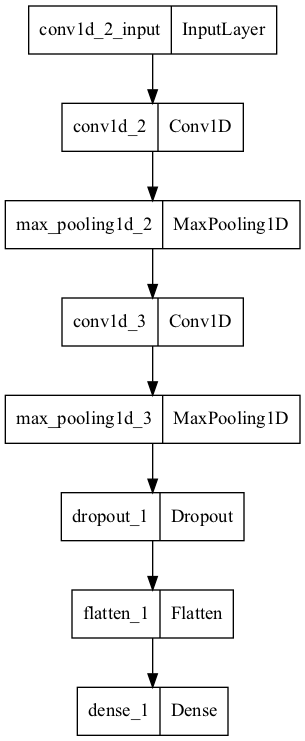

In [1098]:
keras.utils.plot_model(model_3)

In [1099]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 85, 56)            6720      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 42, 56)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 56)            22008     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 18, 56)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 56)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1008)             

In [1100]:
hist_model_3 = model_3.fit(X_train_model_3, Y_train_model3, epochs=10, validation_data=(X_cv_model_3, Y_cv_model3), callbacks=[callback_3], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 98/105 [===========================>..] - ETA: 0s - loss: 0.0794 - asset_return: 0.0196 - mse: 0.0794WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe4b02edcb0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

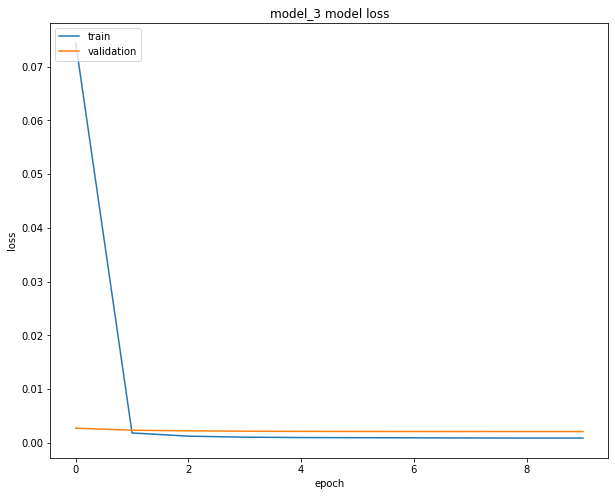

In [1101]:
_ = plotTrain(hist_model_3, "model_3")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1102]:
print("The number of weights in this model is {}.".format(model_3.count_params()))

The number of weights in this model is 29737.


In [1103]:
results.append(['model_3'] + model_3.evaluate(X_train_model_3, Y_train_model3)[:2])
in_sample_pred = model_3.predict(X_train_model_3)
len(in_sample_pred)

105/105 [==============================] - 0s 1ms/step - loss: 8.5511e-04 - asset_return: 0.0812 - mse: 8.5511e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3349

In [1104]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_3 model" has in-sample MSE 0.000855, 
whole-period compounded return rate 0.0812.


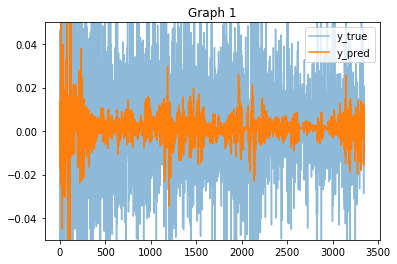

In [1105]:
plt.plot(np.array(Y_train_model3), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

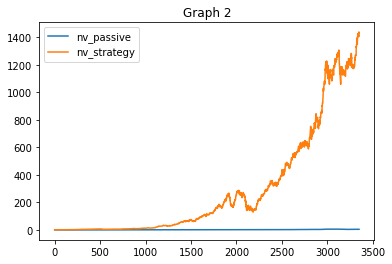

In [1106]:
nv = net_value(np.array(Y_train_model3).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train_model3) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1107]:
results[-1].extend(model_3.evaluate(X_cv_model_3, Y_cv_model3)[:2])
out_sample_pred = model_3.predict(X_cv_model_3)
len(out_sample_pred)
results

14/14 [==============================] - 0s 2ms/step - loss: 0.0021 - asset_return: -0.0496 - mse: 0.0021   


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081],
 ['model_3',
  0.0008551109931431711,
  0.08122507482767105,
  0.002084811683744192,
  -0.04964093118906021]]

In [1108]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_3 model" has out-sample MSE 0.002085, 
whole-period compounded return rate -0.0496.


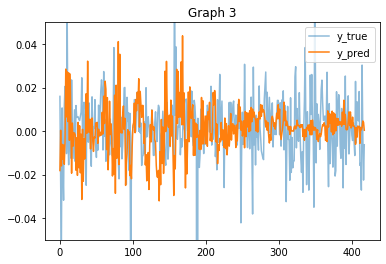

In [1109]:
plt.plot(np.array(Y_cv_model3), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

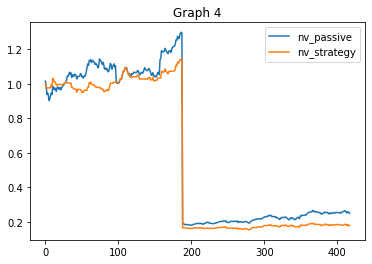

In [1110]:
nv = net_value(np.array(Y_cv_model3).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv_model3) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

### Conclusion
Comparing with model 1 and model 2, model 3 does not improvement on its ability to predict one-day ahead stock return. The model can capture some of the up and down events. The in-sample is reduced while out-sample mse is increased. The model might has great problem in overfitting. 

In terms of the strategy net value graphes, out-sample performance is worse than holding-all-the-time strategy while in-sample performance is too good to be not overfitting. Outperformance in such large scale makes it even suspicous that this model might overfit. 

Based on the performance of model 3, I will explore algorighm in the following directions:
- Use more variables and construct more complex models. I will add volumn channels to X in model 4.
- Lessen overfitting situation in training set. To achieve this, I will add regulization in model 5.

# *Model 4* design
Based on the previous models, in this model, I add in volume data and double the number of channels. 

Details for *model 4*:
- Model: Convolutional Neural Network.
- Data: data with lagged periods from companies without NaN
- Features: percentage close return rate, percentage volume change.

## Data fetch
To add in a series of lagged variables, I create the following function to create training data with a structure *sample size* **x** *lag periods* **x** *channels*. For starters, model 4 has channel equal to company number as I consider each company's return rate data here. 

In [1111]:
X, Y = Generate3D(var_ls=['Close', 'Volume'])

Data acquisition completed! Close, Volume
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185, 91, 34)


## Create test set - *Model 4*

In [1112]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X, Y, test_size=X.shape[0]//10, shuffle=False)
X_train_model4, X_cv_model4, Y_train_model4, Y_cv_model4 = train_test_split(X_train4, Y_train4, test_size=X.shape[0]//10, shuffle=False)

print("The shape of X_train", X_train_model4.shape)
print("The shape of X_cv", X_cv_model4.shape)
print("The shape of X_test", X_test4.shape)

The shape of X_train (3349, 91, 34)
The shape of X_cv (418, 91, 34)
The shape of X_test (418, 91, 34)


# For *Model 4* Usage - Prepare the Data
## Cleaning
No NaN exists in model 4's raw data. So we can skip this step for now. 

## Handle non-numeric attributes
All of the attributes are already in numeric form. No need to implement this step. So I skip for now. 

## Transformation
As analyzed in EDA, we need to handle the problem of outlier. After this winsorization process, the data will not exceed 1% and 99% percentile. To ensure no data leakage, I need to wrap it into a scikit-learn pipeline. 

## Scaling
I will use sklearn's StandardScaler to scale the data. 

## Preparation wrapping up - *Model 4*

Now, I wrap cleaning, numeric handling, transformation, scaling into a single preprocess pipeline for *Model 4*, ``Pipe_model_4``.

In [1113]:
def Pipe_model_4():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

In preparing *Model 4*'s data, we can simply achieve that by calling ``GeneralPrepare``.

In [1114]:
shape_4_1, shape_4_2 = X_train_model4.shape, X_cv_model4.shape
X_train_model_4, X_cv_model_4 = GeneralPrepare(X_train_model4, X_cv_model4, flatten3D, Pipe_model_4, "./models/model_4/model_4")
X_train_model_4, X_cv_model_4 = X_train_model_4.reshape(shape_4_1), X_cv_model_4.reshape(shape_4_2)
X_train_model_4.shape, X_cv_model_4.shape

((3349, 91, 34), (418, 91, 34))

In [1115]:
print("Before GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model4[:, 0].max(), X_train_model4[:, 0].min()))
print("After GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model_4[:, 0].max(), X_train_model_4[:, 0].min()))
print("Before GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model4[:, 0].max(), X_cv_model4[:, 0].min()))
print("After GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model_4[:, 0].max(), X_cv_model_4[:, 0].min()))

Before GeneralPrepare, X_train max value of the first col is 2148.79, the min value is -1.00.
After GeneralPrepare, X_train max value of the first col is 2.11, the min value is -1.76.
Before GeneralPrepare, X_cv max value of the first col is 11.15, the min value is -0.85.
After GeneralPrepare, X_cv max value of the first col is 2.11, the min value is -1.76.


We can conclude that both training data and cross validation has been successfully converted. Besides, the pipeline and the function has been saved to pickle files. 

# For *Model 4* Usage - Train a Model
## Select a model, fit, and cross validation
As a result of the struction of Keras, I decide the workflow of this part should be an integration of model selection, fit and cross validation. To achieve this, I utilize Keras tuner to select the best parameter for simple neural network model. 

The parameters for choice include:
- units in each dense layer
- filter number
- kernel size
- dropout rate

The model takes a form of **Input** -> ( **Conv1D** -> **Maxpooling** ) x **n** -> **Dropout** -> **Output**. In this process, I use hyperparameter tuning to find the node number in each layer and the number of layers. Hence, the model with the highest cross validation mean squared error is the model with the most suitable structure for this problem. 

**Hyperparameter Tuning**
The code chunk below is the process to pick the best model for *model 4*

In [1116]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt

def convNN(nlayer, filters, kernel_size, dropout):
    model = keras.Sequential()
    for i in range(nlayer):
        model.add(layers.Conv1D(filters=filters, 
                                kernel_size=kernel_size, 
                                activation='relu', 
                                data_format='channels_last', 
                                padding='valid'))
        model.add(layers.MaxPooling1D(pool_size=2, 
                                      padding='valid'))
    model.add(layers.Dropout(rate=dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(1 ,activation = "linear"))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=7, step=1)
    filters = hp.Int('filters', min_value=32, max_value=96, step=16)
    nlayer = hp.Int('nlayer', min_value=2, max_value=3, step=1)
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.35, step=0.1)
    model = convNN(nlayer, filters, kernel_size, dropout)
    return model

callback_4 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='./hist/dir4',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_model_4, Y_train_model4, epochs=10, validation_data=(X_cv_model_4, Y_cv_model4), callbacks=[callback_4], shuffle=False)

Trial 60 Complete [00h 00m 13s]
val_loss: 0.0021764906123280525

Best val_loss So Far: 0.0019586512353271246
Total elapsed time: 00h 11m 39s
INFO:tensorflow:Oracle triggered exit


In [1117]:
print(tuner.results_summary())
model_4_best_params = tuner.get_best_hyperparameters()[0]
model_4 = build_model(model_4_best_params)
model_4.build(input_shape=(None, X_train_model_4.shape[1], X_train_model_4.shape[2]))

Results summary
Results in ./hist/dir4/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
kernel_size: 5
filters: 80
nlayer: 3
dropout: 0.15000000000000002
Score: 0.0019586512353271246
Trial summary
Hyperparameters:
kernel_size: 6
filters: 64
nlayer: 3
dropout: 0.15000000000000002
Score: 0.0019704061560332775
Trial summary
Hyperparameters:
kernel_size: 5
filters: 64
nlayer: 3
dropout: 0.35000000000000003
Score: 0.0019776977133005857
Trial summary
Hyperparameters:
kernel_size: 4
filters: 48
nlayer: 3
dropout: 0.15000000000000002
Score: 0.0019781768787652254
Trial summary
Hyperparameters:
kernel_size: 3
filters: 32
nlayer: 3
dropout: 0.25000000000000006
Score: 0.0019831254612654448
Trial summary
Hyperparameters:
kernel_size: 4
filters: 96
nlayer: 3
dropout: 0.15000000000000002
Score: 0.001985755516216159
Trial summary
Hyperparameters:
kernel_size: 6
filters: 32
nlayer: 3
dropout: 0.25000000000000006
Score: 0.0019859238527715

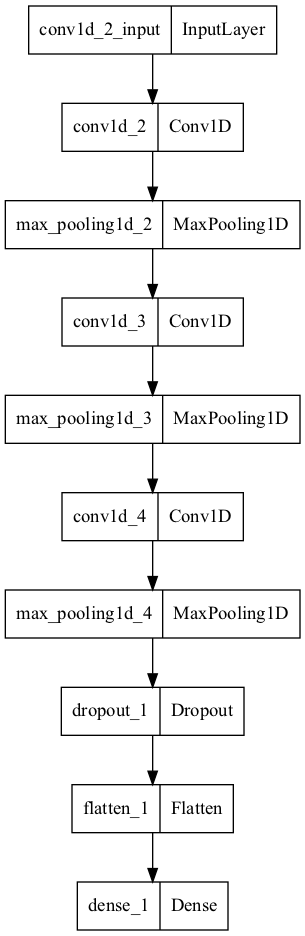

In [1118]:
keras.utils.plot_model(model_4)

In [1119]:
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 87, 80)            13680     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 43, 80)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 39, 80)            32080     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 19, 80)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 15, 80)            32080     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 7, 80)           

In [1120]:
hist_model_4 = model_4.fit(X_train_model_4, Y_train_model4, epochs=10, validation_data=(X_cv_model_4, Y_cv_model4), callbacks=[callback_4], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
101/105 [===========================>..] - ETA: 0s - loss: 0.0538 - asset_return: 0.0213 - mse: 0.0538WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe4afe56dd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

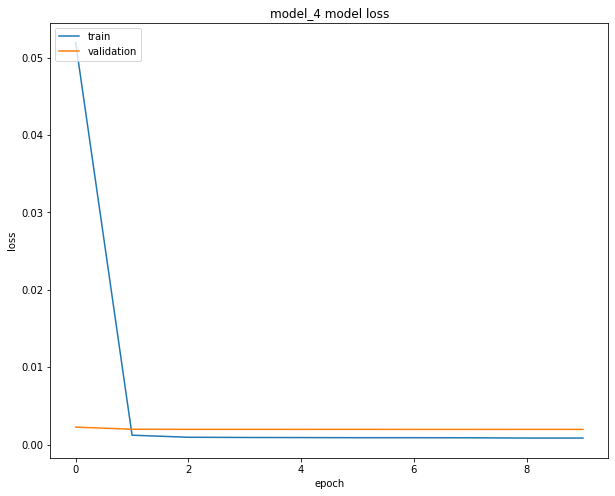

In [1121]:
_ = plotTrain(hist_model_4, "model_4")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1122]:
print("The number of weights in this model is {}.".format(model_4.count_params()))

The number of weights in this model is 78401.


In [1123]:
results.append(['model_4'] + model_4.evaluate(X_train_model_4, Y_train_model4)[:2])
in_sample_pred = model_4.predict(X_train_model_4)
len(in_sample_pred)

105/105 [==============================] - 0s 2ms/step - loss: 8.3502e-04 - asset_return: 0.0830 - mse: 8.3502e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3349

In [1124]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_4 model" has in-sample MSE 0.000835, 
whole-period compounded return rate 0.0830.


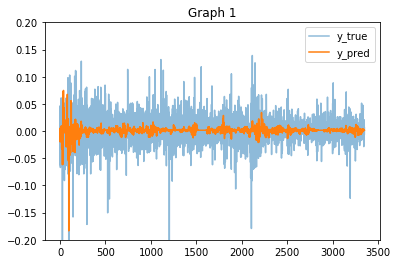

In [1125]:
plt.plot(np.array(Y_train_model4), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

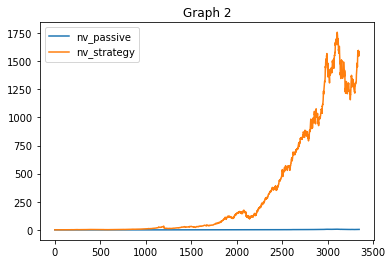

In [1126]:
nv = net_value(np.array(Y_train_model4).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train_model4) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1127]:
results[-1].extend(model_4.evaluate(X_cv_model_4, Y_cv_model4)[:2])
out_sample_pred = model_4.predict(X_cv_model_4)
len(out_sample_pred)
results

14/14 [==============================] - 0s 3ms/step - loss: 0.0020 - asset_return: 0.0273 - mse: 0.0020    


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081],
 ['model_3',
  0.0008551109931431711,
  0.08122507482767105,
  0.002084811683744192,
  -0.04964093118906021],
 ['model_4',
  0.0008350167772732675,
  0.08300109207630157,
  0.0019694636575877666,
  0.027255283668637276]]

In [1128]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_4 model" has out-sample MSE 0.001969, 
whole-period compounded return rate 0.0273.


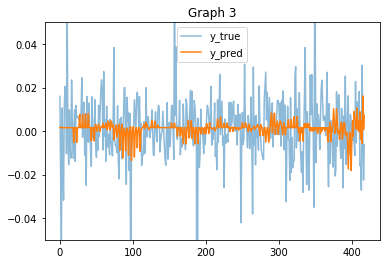

In [1129]:
plt.plot(np.array(Y_cv_model4), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

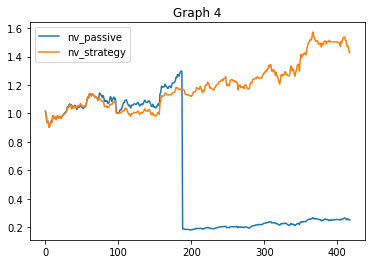

In [1130]:
nv = net_value(np.array(Y_cv_model4).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv_model4) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

### Conclusion


The joining of volume data does improve our model's out-sample performance. The strategy has a net value higher than holding-all-the-time though end up in a small underperformance. However, the in-sample overfitting problem becomes more serious. 

So in the coming model 5, I further add regularization layer and pooling layer to control the in-sample over-fitting issue. 

# *Model 5* design
Based on model 4, I further included regularization in hyperparameter search. 

## Data fetch
The data acquiring process is the same as model 4.

In [1131]:
X, Y = Generate3D(var_ls=['Close', 'Volume'])

Data acquisition completed! Close, Volume
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185, 91, 34)


## Create test set - *Model 5*

In [1132]:
X_train5, X_test5, Y_train5, Y_test5 = train_test_split(X, Y, test_size=X.shape[0]//10, shuffle=False)
X_train_model5, X_cv_model5, Y_train_model5, Y_cv_model5 = train_test_split(X_train5, Y_train5, test_size=X.shape[0]//10, shuffle=False)

print("The shape of X_train", X_train_model5.shape)
print("The shape of X_cv", X_cv_model5.shape)
print("The shape of X_test", X_test5.shape)

The shape of X_train (3349, 91, 34)
The shape of X_cv (418, 91, 34)
The shape of X_test (418, 91, 34)


# For *Model 5* Usage - Prepare the Data
## Cleaning
No NaN exists in model 5's raw data. So we can skip this step for now. 

## Handle non-numeric attributes
All of the attributes are already in numeric form. No need to implement this step. So I skip for now. 

## Transformation
As analyzed in EDA, we need to handle the problem of outlier. After this winsorization process, the data will not exceed 1% and 99% percentile. To ensure no data leakage, I need to wrap it into a scikit-learn pipeline. 

## Scaling
I will use sklearn's StandardScaler to scale the data. 

## Preparation wrapping up - *Model 5*

Now, I wrap cleaning, numeric handling, transformation, scaling into a single preprocess pipeline for *Model 5*, ``Pipe_model_5``.

In [1133]:
def Pipe_model_5():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

In preparing *Model 5*'s data, we can simply achieve that by calling ``GeneralPrepare``.

In [1134]:
shape_5_1, shape_5_2 = X_train_model5.shape, X_cv_model5.shape
X_train_model_5, X_cv_model_5 = GeneralPrepare(X_train_model5, X_cv_model5, flatten3D, Pipe_model_5, "./models/model_5/model_5")
X_train_model_5, X_cv_model_5 = X_train_model_5.reshape(shape_5_1), X_cv_model_5.reshape(shape_5_2)
X_train_model_5.shape, X_cv_model_5.shape

((3349, 91, 34), (418, 91, 34))

In [1135]:
print("Before GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model5[:, 0].max(), X_train_model5[:, 0].min()))
print("After GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model_5[:, 0].max(), X_train_model_5[:, 0].min()))
print("Before GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model5[:, 0].max(), X_cv_model5[:, 0].min()))
print("After GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model_5[:, 0].max(), X_cv_model_5[:, 0].min()))

Before GeneralPrepare, X_train max value of the first col is 2148.79, the min value is -1.00.
After GeneralPrepare, X_train max value of the first col is 2.11, the min value is -1.76.
Before GeneralPrepare, X_cv max value of the first col is 11.15, the min value is -0.85.
After GeneralPrepare, X_cv max value of the first col is 2.11, the min value is -1.76.


We can conclude that both training data and cross validation has been successfully converted. Besides, the pipeline and the function has been saved to pickle files. 

# For *Model 5* Usage - Train a Model
## Select a model, fit, and cross validation
As a result of the struction of Keras, I decide the workflow of this part should be an integration of model selection, fit and cross validation. To achieve this, I utilize Keras tuner to select the best parameter for simple neural network model. 

The parameters for choice include:
- units in each dense layer
- dropout percentage
- number of layer
-regulization

The model takes a form of **Input** -> ( **Dense** -> **Dropout** ) x **n** -> **Output**. In this process, I use hyperparameter tuning to find the node number in each layer and the number of layers. Hence, the model with the highest cross validation mean squared error is the model with the most suitable structure for this problem. 

**Hyperparameter Tuning**
The code chunk below is the process to pick the best model for *model 5*

In [1136]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow.keras import regularizers

def convNN(nlayer, filters, kernel_size, dropout, regulize):
    model = keras.Sequential()
    for i in range(nlayer):
        model.add(layers.Conv1D(filters=filters, 
                                kernel_size=kernel_size, 
                                activation='relu', 
                                data_format='channels_last', 
                                padding='valid'))
        model.add(layers.MaxPooling1D(pool_size=2, 
                                    padding='valid'))
    model.add(layers.Dropout(rate=dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(1 ,activation = "linear", kernel_regularizer=regularizers.L2(regulize), bias_regularizer=regularizers.L2(regulize), activity_regularizer=regularizers.L2(regulize)))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=7, step=1)
    filters = hp.Int('filters', min_value=32, max_value=96, step=16)
    nlayer = hp.Int('nlayer', min_value=2, max_value=3, step=1)
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.35, step=0.1)
    regulize = hp.Float('regulize', min_value=1e-6, max_value=1e-3, sampling='log')
    model = convNN(nlayer, filters, kernel_size, dropout, regulize)
    return model

callback_5 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='./hist/dir5',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_model_5, Y_train_model5, epochs=10, validation_data=(X_cv_model_5, Y_cv_model5), callbacks=[callback_5], shuffle=False)

Trial 60 Complete [00h 00m 08s]
val_loss: 0.0022641008254140615

Best val_loss So Far: 0.0019347650231793523
Total elapsed time: 00h 11m 36s
INFO:tensorflow:Oracle triggered exit


In [1137]:
print(tuner.results_summary())
model_5_best_params = tuner.get_best_hyperparameters()[0]
model_5 = build_model(model_5_best_params)
model_5.build(input_shape=(None, X_train_model_5.shape[1], X_train_model_5.shape[2]))

Results summary
Results in ./hist/dir5/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
kernel_size: 6
filters: 80
nlayer: 3
dropout: 0.25000000000000006
regulize: 2.0574443180671016e-06
Score: 0.0019347650231793523
Trial summary
Hyperparameters:
kernel_size: 4
filters: 80
nlayer: 3
dropout: 0.25000000000000006
regulize: 1.827698100987925e-06
Score: 0.001969254808500409
Trial summary
Hyperparameters:
kernel_size: 7
filters: 48
nlayer: 3
dropout: 0.25000000000000006
regulize: 5.450097223200368e-06
Score: 0.0019764802418649197
Trial summary
Hyperparameters:
kernel_size: 4
filters: 48
nlayer: 3
dropout: 0.15000000000000002
regulize: 1.2277148488534138e-06
Score: 0.0019771000370383263
Trial summary
Hyperparameters:
kernel_size: 3
filters: 80
nlayer: 3
dropout: 0.35000000000000003
regulize: 9.359659238480389e-06
Score: 0.0019862072076648474
Trial summary
Hyperparameters:
kernel_size: 4
filters: 64
nlayer: 3
dropout: 0.05
regu

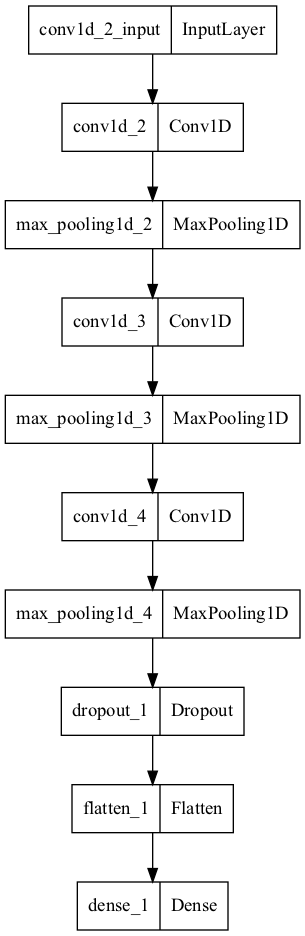

In [1138]:
keras.utils.plot_model(model_5)

In [1139]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 86, 80)            16400     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 43, 80)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 38, 80)            38480     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 19, 80)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 14, 80)            38480     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 7, 80)           

In [1140]:
hist_model_5 = model_5.fit(X_train_model_5, Y_train_model5, epochs=10, validation_data=(X_cv_model_5, Y_cv_model5), callbacks=[callback_5], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
104/105 [============================>.] - ETA: 0s - loss: 0.0710 - asset_return: 0.0168 - mse: 0.0710WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe4b068eef0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

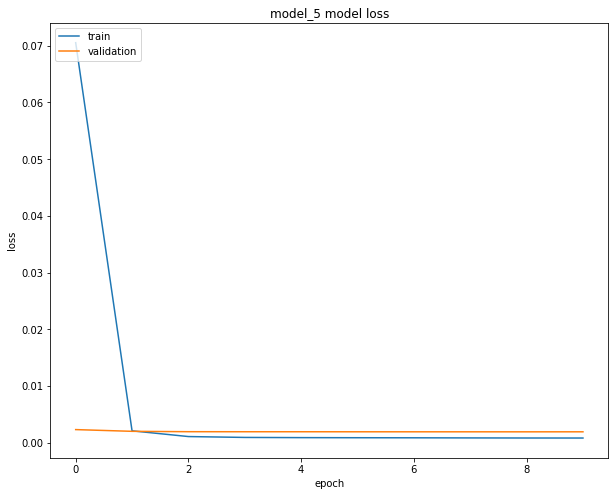

In [1141]:
_ = plotTrain(hist_model_5, "model_5")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1142]:
print("The number of weights in this model is {}.".format(model_5.count_params()))

The number of weights in this model is 93921.


In [1143]:
results.append(['model_5'] + model_5.evaluate(X_train_model_5, Y_train_model5)[:2])
in_sample_pred = model_5.predict(X_train_model_5)
len(in_sample_pred)

105/105 [==============================] - 0s 4ms/step - loss: 8.2858e-04 - asset_return: 0.1066 - mse: 8.2494e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3349

In [1144]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_5 model" has in-sample MSE 0.000829, 
whole-period compounded return rate 0.1066.


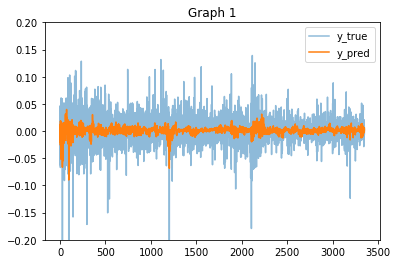

In [1145]:
plt.plot(np.array(Y_train_model5), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

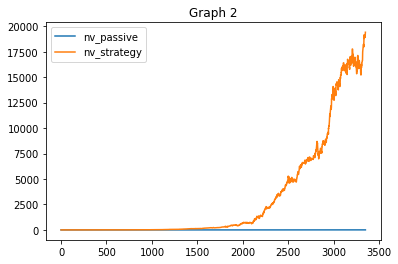

In [1146]:
nv = net_value(np.array(Y_train_model5).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train_model5) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1147]:
results[-1].extend(model_5.evaluate(X_cv_model_5, Y_cv_model5)[:2])
out_sample_pred = model_5.predict(X_cv_model_5)
len(out_sample_pred)
results

14/14 [==============================] - 0s 2ms/step - loss: 0.0020 - asset_return: 0.0313 - mse: 0.0020    


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081],
 ['model_3',
  0.0008551109931431711,
  0.08122507482767105,
  0.002084811683744192,
  -0.04964093118906021],
 ['model_4',
  0.0008350167772732675,
  0.08300109207630157,
  0.0019694636575877666,
  0.027255283668637276],
 ['model_5',
  0.0008285818621516228,
  0.10663911700248718,
  0.0019584977999329567,
  0.03126559779047966]]

In [1148]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_5 model" has out-sample MSE 0.001958, 
whole-period compounded return rate 0.0313.


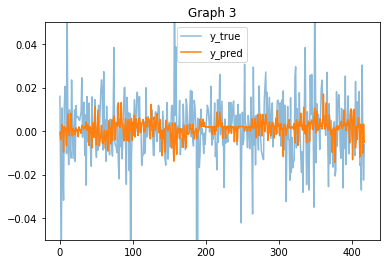

In [1149]:
plt.plot(np.array(Y_cv_model5), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

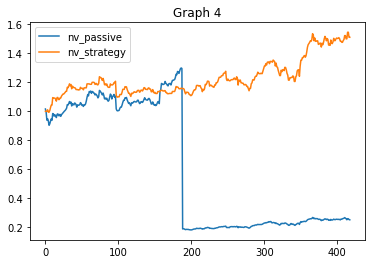

In [1150]:
nv = net_value(np.array(Y_cv_model5).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv_model5) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

### Conclusion


Comparing with model 4, after bringing regularization, model 5 has smaller out-sample mse and larger in-sample mse. The overfitting problem gets alleviatd. Additionally, graph 2 also proves this comparing graph 2 in model 3. 

In graph 4, the model has great out-sample outperformance. However, the curve is going more volatile. And the outperformance mainly comes from the escape of the largest drawdown.  

In model 6, I want to see how the joining of other channels, including open, high, low, can impact the results. 

In a later model, I also want to see whether implementing denoising can reduce the return rates' volatility. 

# *Model 6* design
In this model, I will include channels including open, high, low.

In [1151]:
X, Y = Generate3D(var_ls=['Close', 'Volume', 'Open', 'High', 'Low'])

Data acquisition completed! Close, Volume, Open, High, Low
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185, 91, 85)


## Create test set - *Model 6*

In [1152]:
X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X, Y, test_size=X.shape[0]//10, shuffle=False)
X_train_model6, X_cv_model6, Y_train_model6, Y_cv_model6 = train_test_split(X_train6, Y_train6, test_size=X.shape[0]//10, shuffle=False)

print("The shape of X_train", X_train_model6.shape)
print("The shape of X_cv", X_cv_model6.shape)
print("The shape of X_test", X_test6.shape)

The shape of X_train (3349, 91, 85)
The shape of X_cv (418, 91, 85)
The shape of X_test (418, 91, 85)


# For *Model 6* Usage - Prepare the Data
## Cleaning
No NaN exists in model 6's raw data. So we can skip this step for now. 

## Handle non-numeric attributes
All of the attributes are already in numeric form. No need to implement this step. So I skip for now. 

## Transformation
As analyzed in EDA, we need to handle the problem of outlier. After this winsorization process, the data will not exceed 1% and 99% percentile. To ensure no data leakage, I need to wrap it into a scikit-learn pipeline. 

## Scaling
I will use sklearn's StandardScaler to scale the data. 

## Preparation wrapping up - *Model 6*

Now, I wrap cleaning, numeric handling, transformation, scaling into a single preprocess pipeline for *Model 6*, ``Pipe_model_6``.

In [1153]:
def Pipe_model_6():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

In preparing *Model 6*'s data, we can simply achieve that by calling ``GeneralPrepare``.

In [1154]:
shape_6_1, shape_6_2 = X_train_model6.shape, X_cv_model6.shape
X_train_model_6, X_cv_model_6 = GeneralPrepare(X_train_model6, X_cv_model6, flatten3D, Pipe_model_6, "./models/model_6/model_6")
X_train_model_6, X_cv_model_6 = X_train_model_6.reshape(shape_6_1), X_cv_model_6.reshape(shape_6_2)
X_train_model_6.shape, X_cv_model_6.shape

((3349, 91, 85), (418, 91, 85))

In [1155]:
print("Before GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model6[:, 0].max(), X_train_model6[:, 0].min()))
print("After GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model_6[:, 0].max(), X_train_model_6[:, 0].min()))
print("Before GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model6[:, 0].max(), X_cv_model6[:, 0].min()))
print("After GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model_6[:, 0].max(), X_cv_model_6[:, 0].min()))

Before GeneralPrepare, X_train max value of the first col is 2148.79, the min value is -1.00.
After GeneralPrepare, X_train max value of the first col is 2.11, the min value is -1.76.
Before GeneralPrepare, X_cv max value of the first col is 11.15, the min value is -0.86.
After GeneralPrepare, X_cv max value of the first col is 2.11, the min value is -1.76.


We can conclude that both training data and cross validation has been successfully converted. Besides, the pipeline and the function has been saved to pickle files. 

# For *Model 6* Usage - Train a Model
## Select a model, fit, and cross validation
As a result of the struction of Keras, I decide the workflow of this part should be an integration of model selection, fit and cross validation. To achieve this, I utilize Keras tuner to select the best parameter for simple neural network model. 

The parameters for choice include:
- dropout percentage.
- number of layer. 
- regulization.
- kernel size
- filter number

The model takes a form of **Input** -> ( **Conv1D** -> **Maxpooling** ) x **n** -> **Dropout** -> **Output**. In this process, I use hyperparameter tuning to find the node number in each layer and the number of layers. Hence, the model with the highest cross validation mean squared error is the model with the most suitable structure for this problem. 

**Hyperparameter Tuning**
The code chunk below is the process to pick the best model for *model 6*

In [1156]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow.keras import regularizers

def convNN(nlayer, filters, kernel_size, dropout, regulize):
    model = keras.Sequential()
    for i in range(nlayer):
        model.add(layers.Conv1D(filters=filters, 
                                kernel_size=kernel_size, 
                                activation='relu', 
                                data_format='channels_last', 
                                padding='valid'))
        model.add(layers.MaxPooling1D(pool_size=2, 
                                    padding='valid'))
    model.add(layers.Dropout(rate=dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(1 ,activation = "linear", kernel_regularizer=regularizers.L2(regulize), bias_regularizer=regularizers.L2(regulize), activity_regularizer=regularizers.L2(regulize)))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=7, step=1)
    filters = hp.Int('filters', min_value=32, max_value=96, step=16)
    nlayer = hp.Int('nlayer', min_value=2, max_value=3, step=1)
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.35, step=0.1)
    regulize = hp.Float('regulize', min_value=1e-6, max_value=1e-3, sampling='log')
    model = convNN(nlayer, filters, kernel_size, dropout, regulize)
    return model

callback_6 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='./hist/dir6',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_model_6, Y_train_model6, epochs=10, validation_data=(X_cv_model_6, Y_cv_model6), callbacks=[callback_6], shuffle=False)

Trial 60 Complete [00h 00m 08s]
val_loss: 0.003228840883821249

Best val_loss So Far: 0.0019336921395733953
Total elapsed time: 00h 12m 04s
INFO:tensorflow:Oracle triggered exit


In [1157]:
print(tuner.results_summary())
model_6_best_params = tuner.get_best_hyperparameters()[0]
model_6 = build_model(model_6_best_params)
model_6.build(input_shape=(None, X_train_model_6.shape[1], X_train_model_6.shape[2]))

Results summary
Results in ./hist/dir6/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
kernel_size: 7
filters: 48
nlayer: 3
dropout: 0.25000000000000006
regulize: 5.450097223200368e-06
Score: 0.0019336921395733953
Trial summary
Hyperparameters:
kernel_size: 4
filters: 64
nlayer: 3
dropout: 0.05
regulize: 1.0446693643848288e-06
Score: 0.0019373818067833781
Trial summary
Hyperparameters:
kernel_size: 3
filters: 96
nlayer: 3
dropout: 0.25000000000000006
regulize: 8.837014475882626e-06
Score: 0.0020197161938995123
Trial summary
Hyperparameters:
kernel_size: 5
filters: 96
nlayer: 3
dropout: 0.25000000000000006
regulize: 1.2935491364536118e-05
Score: 0.002026695990934968
Trial summary
Hyperparameters:
kernel_size: 4
filters: 80
nlayer: 3
dropout: 0.25000000000000006
regulize: 1.827698100987925e-06
Score: 0.0020290452521294355
Trial summary
Hyperparameters:
kernel_size: 3
filters: 80
nlayer: 3
dropout: 0.35000000000000003
regu

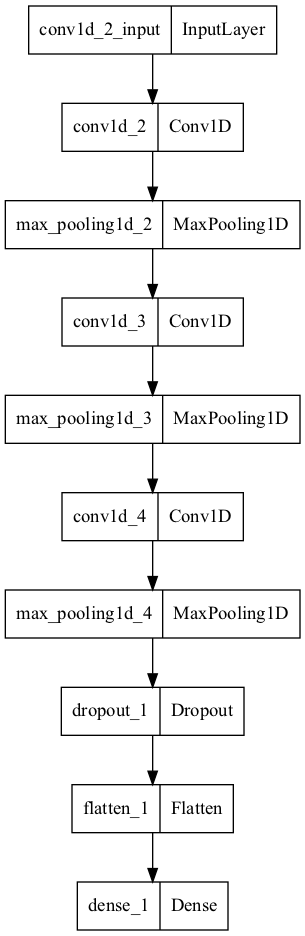

In [1158]:
keras.utils.plot_model(model_6)

In [1159]:
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 85, 48)            28608     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 42, 48)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 36, 48)            16176     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 18, 48)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 12, 48)            16176     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 6, 48)           

In [1160]:
hist_model_6 = model_6.fit(X_train_model_6, Y_train_model6, epochs=10, validation_data=(X_cv_model_6, Y_cv_model6), callbacks=[callback_6], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
102/105 [============================>.] - ETA: 0s - loss: 0.1192 - asset_return: 0.0259 - mse: 0.1192WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe590ef8320> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

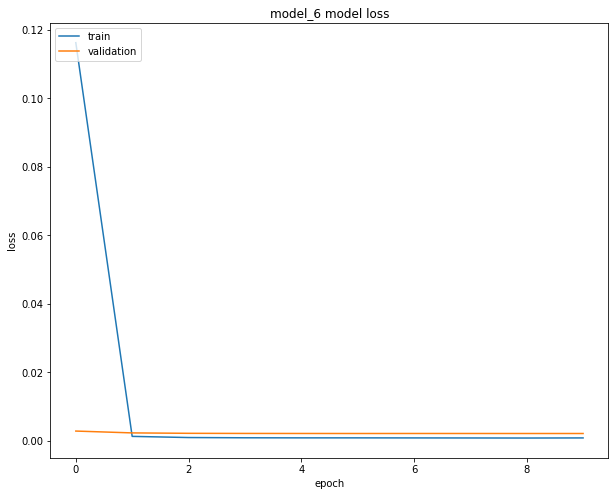

In [1161]:
_ = plotTrain(hist_model_6, "model_6")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1162]:
print("The number of weights in this model is {}.".format(model_6.count_params()))

The number of weights in this model is 61249.


In [1163]:
results.append(['model_6'] + model_6.evaluate(X_train_model_6, Y_train_model6)[:2])
in_sample_pred = model_6.predict(X_train_model_6)
len(in_sample_pred)

105/105 [==============================] - 0s 2ms/step - loss: 8.7177e-04 - asset_return: 0.0657 - mse: 8.6307e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3349

In [1164]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_6 model" has in-sample MSE 0.000872, 
whole-period compounded return rate 0.0657.


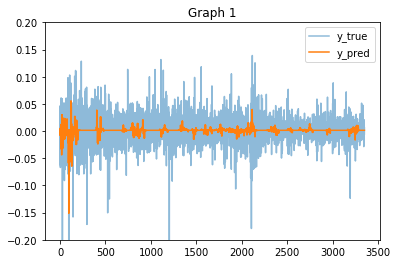

In [1165]:
plt.plot(np.array(Y_train_model6), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

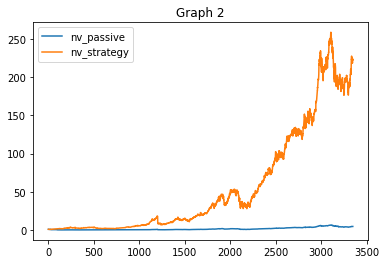

In [1166]:
nv = net_value(np.array(Y_train_model6).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train_model6) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1167]:
results[-1].extend(model_6.evaluate(X_cv_model_6, Y_cv_model6)[:2])
out_sample_pred = model_6.predict(X_cv_model_6)
len(out_sample_pred)
results

14/14 [==============================] - 0s 2ms/step - loss: 0.0022 - asset_return: -0.0306 - mse: 0.0022   


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081],
 ['model_3',
  0.0008551109931431711,
  0.08122507482767105,
  0.002084811683744192,
  -0.04964093118906021],
 ['model_4',
  0.0008350167772732675,
  0.08300109207630157,
  0.0019694636575877666,
  0.027255283668637276],
 ['model_5',
  0.0008285818621516228,
  0.10663911700248718,
  0.0019584977999329567,
  0.03126559779047966],
 ['model_6',
  0.0008717692689970136,
  0.0657421126961708,
  0.0021893836092203856,
  -0.030602892860770226]]

In [1168]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_6 model" has out-sample MSE 0.002189, 
whole-period compounded return rate -0.0306.


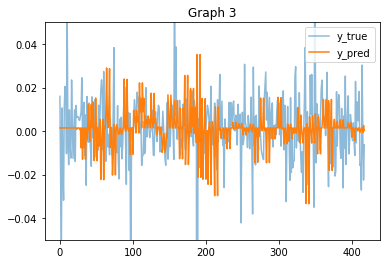

In [1169]:
plt.plot(np.array(Y_cv_model6), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

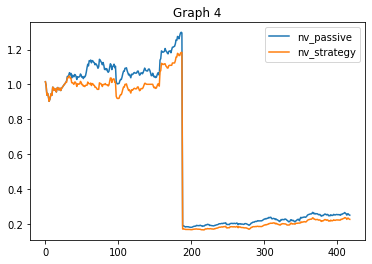

In [1170]:
nv = net_value(np.array(Y_cv_model6).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv_model6) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

### Conclusion


After adding open high low percentage change, the performance of model 6 drops. Though the in-sample mse is smaller than model 5, the out-sample mse is greater. Hence adding these variables only improves in-sample performance but causes more serious out-sample overfitting. 
Next, I will use RNN model.

# *Model 7* design
## Data fetch
Here, I use the same features as model 6. The difference is LSTM need to have spatial dimension in time order. I create a new function ``Generate3DTime`` to ensure this. 

In [1171]:
import math

def Generate3DTime(lag = 90, var_ls=['Close'], dir='./Data/train'):
    comp_list = ['CSCO', 'ADBE', 'XLE', 'INTC', 'XLF', 
                 'XLP', 'MSFT', 'XLB', 'XLU', 'NVDA', 
                 'XLV', 'IBM', 'XLY', 'XLK', 'SPY', 'XLI', 'AAPL']
    data = easyAccess.lsGetCompData(var_ls=var_ls, comp_ls=comp_list, data_path=dir).pct_change()
    data.columns = ['pct ' + x for x in data.columns]
    Y = data['pct AAPL Close'].shift(-1).iloc[:-1]
    data = data.iloc[:-1, :]
    X = []
    for col in data.columns:
        temp = data[[col]].copy()
        for i in range(1, lag+1):
            temp[str(i) + col] = temp[col].shift(i)
        temp.dropna(inplace=True)
        X.append(temp.values)
        Y = Y[temp.index]
        print(Y.shape)
    X = np.array(X)
    X = np.swapaxes(X, 0, 1)
    X = np.swapaxes(X, 1, 2)
    ## spatial in time order
    X = X[:, ::-1, :]
    print(X.shape)
    return X, Y

In [1172]:
X, Y = Generate3DTime(var_ls=['Close', 'Volume'])
X.shape, Y.shape

Data acquisition completed! Close, Volume
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185, 91, 34)


((4185, 91, 34), (4185,))

## Create test set - *Model 7*

In [1173]:
X_train7, X_test7, Y_train7, Y_test7 = train_test_split(X, Y, test_size=X.shape[0]//10, shuffle=False)
X_train_model7, X_cv_model7, Y_train_model7, Y_cv_model7 = train_test_split(X_train7, Y_train7, test_size=X.shape[0]//10, shuffle=False)

print("The shape of X_train", X_train_model7.shape)
print("The shape of X_cv", X_cv_model7.shape)
print("The shape of X_test", X_test7.shape)

The shape of X_train (3349, 91, 34)
The shape of X_cv (418, 91, 34)
The shape of X_test (418, 91, 34)


# For *Model 7* Usage - Prepare the Data
## Cleaning
No NaN exists in model 6's raw data. So we can skip this step for now. 

## Handle non-numeric attributes
All of the attributes are already in numeric form. No need to implement this step. So I skip for now. 

## Transformation
As analyzed in EDA, we need to handle the problem of outlier. After this winsorization process, the data will not exceed 1% and 99% percentile. To ensure no data leakage, I need to wrap it into a scikit-learn pipeline. 

## Scaling
I will use sklearn's StandardScaler to scale the data. 

## Preparation wrapping up - *Model 7*

Now, I wrap cleaning, numeric handling, transformation, scaling into a single preprocess pipeline for *Model 7*, ``Pipe_model_7``.

In [1174]:
def Pipe_model_7():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

In preparing *Model 6*'s data, we can simply achieve that by calling ``GeneralPrepare``.

In [1175]:
shape_7_1, shape_7_2 = X_train_model7.shape, X_cv_model7.shape
X_train_model_7, X_cv_model_7 = GeneralPrepare(X_train_model7, X_cv_model7, flatten3D, Pipe_model_7, "./models/model_7/model_7")
X_train_model_7, X_cv_model_7 = X_train_model_7.reshape(shape_7_1), X_cv_model_7.reshape(shape_7_2)
X_train_model_7.shape, X_cv_model_7.shape

((3349, 91, 34), (418, 91, 34))

In [1176]:
print("Before GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model7[:, 0].max(), X_train_model7[:, 0].min()))
print("After GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model_7[:, 0].max(), X_train_model_7[:, 0].min()))
print("Before GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model7[:, 0].max(), X_cv_model7[:, 0].min()))
print("After GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model_7[:, 0].max(), X_cv_model_7[:, 0].min()))

Before GeneralPrepare, X_train max value of the first col is 2148.79, the min value is -1.00.
After GeneralPrepare, X_train max value of the first col is 2.14, the min value is -1.75.
Before GeneralPrepare, X_cv max value of the first col is 11.15, the min value is -0.85.
After GeneralPrepare, X_cv max value of the first col is 2.14, the min value is -1.75.


We can conclude that both training data and cross validation has been successfully converted. Besides, the pipeline and the function has been saved to pickle files. 

# For *Model 7* Usage - Train a Model
## Select a model, fit, and cross validation
As a result of the struction of Keras, I decide the workflow of this part should be an integration of model selection, fit and cross validation. To achieve this, I utilize Keras tuner to select the best parameter for simple neural network model. 

The parameters for choice include:
- units in each dense layer.
- dropout percentage.
- number of layer. 
- regulization.

The model takes a form of **Input** -> ( **Dense** -> **Dropout** ) x **n** -> **Output**. In this process, I use hyperparameter tuning to find the node number in each layer and the number of layers. Hence, the model with the highest cross validation mean squared error is the model with the most suitable structure for this problem. 

The main difference is the joining of **LSTM layer**.

**Hyperparameter Tuning**
The code chunk below is the process to pick the best model for *model 7*

In [1177]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow.keras import regularizers

def LSTM(dropout, regulize, lsunits):
    model = keras.Sequential()
    model.add(layers.LSTM(units=lsunits))
    model.add(layers.Dropout(rate=dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(1 ,activation = "linear", kernel_regularizer=regularizers.L2(regulize), bias_regularizer=regularizers.L2(regulize), activity_regularizer=regularizers.L2(regulize)))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.35, step=0.1)
    regulize = hp.Float('regulize', min_value=1e-6, max_value=1e-3, sampling='log')
    lsunits = hp.Int('lsunits', min_value=16, max_value=96, step=8)
    model = LSTM(dropout, regulize, lsunits)
    return model

callback_7 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='./hist/dir7',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_model_7, Y_train_model7, epochs=10, validation_data=(X_cv_model_7, Y_cv_model7), callbacks=[callback_7], shuffle=False)

Trial 60 Complete [00h 00m 23s]
val_loss: 0.002200742019340396

Best val_loss So Far: 0.0019719430711120367
Total elapsed time: 00h 30m 05s
INFO:tensorflow:Oracle triggered exit


In [1178]:
print(tuner.results_summary())
model_7_best_params = tuner.get_best_hyperparameters()[0]
model_7 = build_model(model_7_best_params)
model_7.build(input_shape=(None, X_train_model_7.shape[1], X_train_model_7.shape[2]))

Results summary
Results in ./hist/dir7/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
dropout: 0.25000000000000006
regulize: 1.5872740971656703e-06
lsunits: 56
Score: 0.0019719430711120367
Trial summary
Hyperparameters:
dropout: 0.35000000000000003
regulize: 4.3692275217518176e-05
lsunits: 80
Score: 0.0020046692807227373
Trial summary
Hyperparameters:
dropout: 0.25000000000000006
regulize: 5.594552042314241e-05
lsunits: 88
Score: 0.0020092069171369076
Trial summary
Hyperparameters:
dropout: 0.25000000000000006
regulize: 1.3605903444776616e-06
lsunits: 88
Score: 0.0020109645556658506
Trial summary
Hyperparameters:
dropout: 0.35000000000000003
regulize: 4.0684306656026695e-06
lsunits: 64
Score: 0.002014556434005499
Trial summary
Hyperparameters:
dropout: 0.35000000000000003
regulize: 1.866463763857711e-06
lsunits: 96
Score: 0.002018227707594633
Trial summary
Hyperparameters:
dropout: 0.25000000000000006
regulize: 3.96977

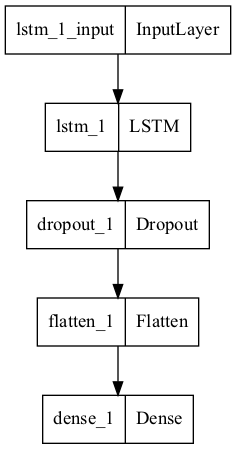

In [1179]:
keras.utils.plot_model(model_7)

In [1180]:
model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 56)                20384     
                                                                 
 dropout_1 (Dropout)         (None, 56)                0         
                                                                 
 flatten_1 (Flatten)         (None, 56)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 57        
                                                                 
Total params: 20,441
Trainable params: 20,441
Non-trainable params: 0
_________________________________________________________________


In [1181]:
hist_model_7 = model_7.fit(X_train_model_7, Y_train_model7, epochs=10, validation_data=(X_cv_model_7, Y_cv_model7), callbacks=[callback_7], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
103/105 [============================>.] - ETA: 0s - loss: 0.0166 - asset_return: 0.0107 - mse: 0.0166WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe50f764dd0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

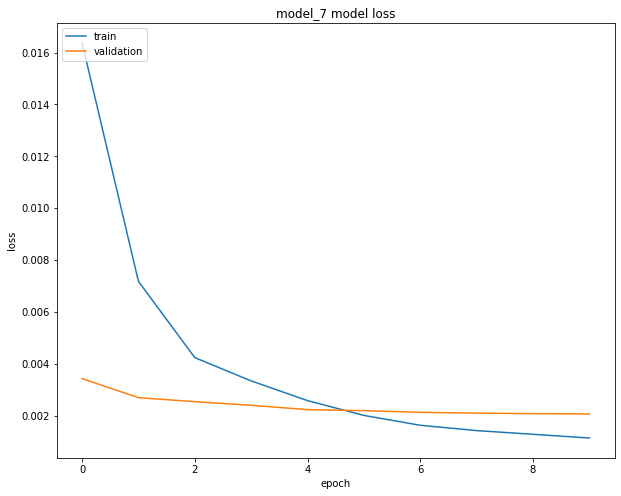

In [1182]:
_ = plotTrain(hist_model_7, "model_7")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1183]:
print("The number of weights in this model is {}.".format(model_7.count_params()))

The number of weights in this model is 20441.


In [1184]:
results.append(['model_7'] + model_7.evaluate(X_train_model_7, Y_train_model7)[:2])
in_sample_pred = model_7.predict(X_train_model_7)
len(in_sample_pred)

105/105 [==============================] - 1s 7ms/step - loss: 8.1461e-04 - asset_return: 0.1039 - mse: 8.1431e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3349

In [1185]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_7 model" has in-sample MSE 0.000815, 
whole-period compounded return rate 0.1039.


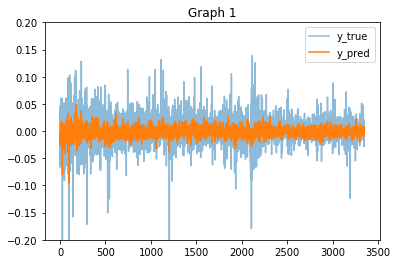

In [1186]:
plt.plot(np.array(Y_train_model7), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

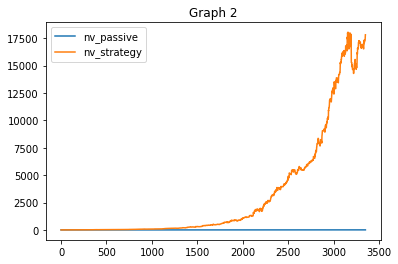

In [1187]:
nv = net_value(np.array(Y_train_model7).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train_model7) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1188]:
results[-1].extend(model_7.evaluate(X_cv_model_7, Y_cv_model7)[:2])
out_sample_pred = model_7.predict(X_cv_model_7)
len(out_sample_pred)
results

14/14 [==============================] - 0s 6ms/step - loss: 0.0021 - asset_return: -0.0507 - mse: 0.0021   


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081],
 ['model_3',
  0.0008551109931431711,
  0.08122507482767105,
  0.002084811683744192,
  -0.04964093118906021],
 ['model_4',
  0.0008350167772732675,
  0.08300109207630157,
  0.0019694636575877666,
  0.027255283668637276],
 ['model_5',
  0.0008285818621516228,
  0.10663911700248718,
  0.0019584977999329567,
  0.03126559779047966],
 ['model_6',
  0.0008717692689970136,
  0.0657421126961708,
  0.0021893836092203856,
  -0.030602892860770226],
 ['model_7',
  0.000814608356449753,
  0.10386872291564941,
  0.002061836188659072,
  -0.05065988376736641]]

In [1189]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_7 model" has out-sample MSE 0.002062, 
whole-period compounded return rate -0.0507.


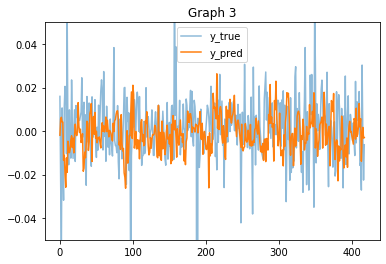

In [1190]:
plt.plot(np.array(Y_cv_model7), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

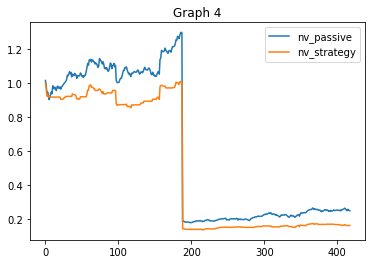

In [1191]:
nv = net_value(np.array(Y_cv_model7).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv_model7) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

### Conclusion

For in-sample performance, as shown in graph 1 and graph 2, there is severe overfitting problem, leaving graph 3 and graph 4 to show an unsatisfying out-sample performance. Indeed the in-sample mse is the lowest but the out-sample mse is not significantly lower. 

Further, I will try to denoise it and see whether LSTM can have greater prediction ability and less overfitting problem. 

# *Model 8* design
## Data fetch
Based on model 7, I add more features to it, including high, low, open. 

In [1192]:
X, Y = Generate3DTime(var_ls=['Close', 'Volume', 'High', 'Low', 'Open'])
X.shape, Y.shape

Data acquisition completed! Close, Volume, High, Low, Open
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185, 91, 85)


((4185, 91, 85), (4185,))

## Create test set - *Model 8*

In [1193]:
X_train8, X_test8, Y_train8, Y_test8 = train_test_split(X, Y, test_size=X.shape[0]//10, shuffle=False)
X_train_model8, X_cv_model8, Y_train_model8, Y_cv_model8 = train_test_split(X_train8, Y_train8, test_size=X.shape[0]//10, shuffle=False)

print("The shape of X_train", X_train_model8.shape)
print("The shape of X_cv", X_cv_model8.shape)
print("The shape of X_test", X_test8.shape)

The shape of X_train (3349, 91, 85)
The shape of X_cv (418, 91, 85)
The shape of X_test (418, 91, 85)


# For *Model 8* Usage - Prepare the Data
## Cleaning
No NaN exists in model 8's raw data. So we can skip this step for now. 

## Handle non-numeric attributes
All of the attributes are already in numeric form. No need to implement this step. So I skip for now. 

## Transformation
As analyzed in EDA, we need to handle the problem of outlier. After this winsorization process, the data will not exceed 1% and 99% percentile. To ensure no data leakage, I need to wrap it into a scikit-learn pipeline. 

## Scaling
I will use sklearn's StandardScaler to scale the data. 

## Preparation wrapping up - *Model 8*

Now, I wrap cleaning, numeric handling, transformation, scaling into a single preprocess pipeline for *Model 8*, ``Pipe_model_8``.

In [1194]:
def Pipe_model_8():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

In preparing *Model 8*'s data, we can simply achieve that by calling ``GeneralPrepare``.

In [1195]:
shape_8_1, shape_8_2 = X_train_model8.shape, X_cv_model8.shape
X_train_model_8, X_cv_model_8 = GeneralPrepare(X_train_model8, X_cv_model8, flatten3D, Pipe_model_8, "./models/model_8/model_8")
X_train_model_8, X_cv_model_8 = X_train_model_8.reshape(shape_8_1), X_cv_model_8.reshape(shape_8_2)
X_train_model_8.shape, X_cv_model_8.shape

((3349, 91, 85), (418, 91, 85))

In [1196]:
print("Before GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model8[:, 0].max(), X_train_model8[:, 0].min()))
print("After GeneralPrepare, X_train max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_train_model_8[:, 0].max(), X_train_model_8[:, 0].min()))
print("Before GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model8[:, 0].max(), X_cv_model8[:, 0].min()))
print("After GeneralPrepare, X_cv max value of the first col is {:.2f}, the min value is {:.2f}.".format(
    X_cv_model_8[:, 0].max(), X_cv_model_8[:, 0].min()))

Before GeneralPrepare, X_train max value of the first col is 2148.79, the min value is -1.00.
After GeneralPrepare, X_train max value of the first col is 2.14, the min value is -1.75.
Before GeneralPrepare, X_cv max value of the first col is 11.15, the min value is -0.86.
After GeneralPrepare, X_cv max value of the first col is 2.14, the min value is -1.75.


We can conclude that both training data and cross validation has been successfully converted. Besides, the pipeline and the function has been saved to pickle files. 

# For *Model 8* Usage - Train a Model
## Select a model, fit, and cross validation
As a result of the struction of Keras, I decide the workflow of this part should be an integration of model selection, fit and cross validation. To achieve this, I utilize Keras tuner to select the best parameter for simple neural network model. 

The parameters for choice include:
- units in each dense layer.
- dropout percentage.
- number of layer. 
- regulization.

The model takes a form of **Input** -> ( **Dense** -> **Dropout** ) x **n** -> **Output**. In this process, I use hyperparameter tuning to find the node number in each layer and the number of layers. Hence, the model with the highest cross validation mean squared error is the model with the most suitable structure for this problem. 

The main difference is the joining of **LSTM layer**.

**Hyperparameter Tuning**
The code chunk below is the process to pick the best model for *model 8*

In [1197]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow.keras import regularizers

def LSTM(dropout, regulize, lsunits):
    model = keras.Sequential()
    model.add(layers.LSTM(units=lsunits))
    model.add(layers.Dropout(rate=dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(1 ,activation = "linear", kernel_regularizer=regularizers.L2(regulize), bias_regularizer=regularizers.L2(regulize), activity_regularizer=regularizers.L2(regulize)))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.35, step=0.1)
    regulize = hp.Float('regulize', min_value=1e-6, max_value=1e-3, sampling='log')
    lsunits = hp.Int('lsunits', min_value=16, max_value=96, step=8)
    model = LSTM(dropout, regulize, lsunits)
    return model

callback_8 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='./hist/dir8',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_model_8, Y_train_model8, epochs=10, validation_data=(X_cv_model_8, Y_cv_model8), callbacks=[callback_8], shuffle=False)

Trial 60 Complete [00h 00m 22s]
val_loss: 0.0022873864509165287

Best val_loss So Far: 0.0020003404933959246
Total elapsed time: 00h 31m 08s
INFO:tensorflow:Oracle triggered exit


In [1198]:
print(tuner.results_summary())
model_8_best_params = tuner.get_best_hyperparameters()[0]
model_8 = build_model(model_8_best_params)
model_8.build(input_shape=(None, X_train_model_8.shape[1], X_train_model_8.shape[2]))

Results summary
Results in ./hist/dir8/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
dropout: 0.35000000000000003
regulize: 4.3692275217518176e-05
lsunits: 80
Score: 0.0020003404933959246
Trial summary
Hyperparameters:
dropout: 0.35000000000000003
regulize: 4.0684306656026695e-06
lsunits: 64
Score: 0.002003304660320282
Trial summary
Hyperparameters:
dropout: 0.15000000000000002
regulize: 1.1316508874755522e-05
lsunits: 80
Score: 0.0020263083279132843
Trial summary
Hyperparameters:
dropout: 0.25000000000000006
regulize: 1.1417198953443434e-05
lsunits: 40
Score: 0.0020423149690032005
Trial summary
Hyperparameters:
dropout: 0.25000000000000006
regulize: 0.00013174107585186577
lsunits: 96
Score: 0.002065629232674837
Trial summary
Hyperparameters:
dropout: 0.25000000000000006
regulize: 3.969777071876592e-06
lsunits: 80
Score: 0.0020660057198256254
Trial summary
Hyperparameters:
dropout: 0.25000000000000006
regulize: 5.8422

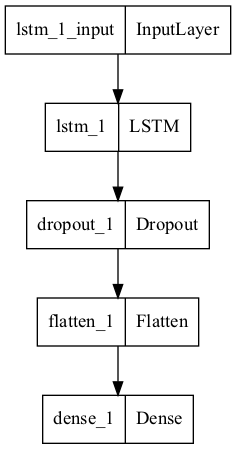

In [1199]:
keras.utils.plot_model(model_8)

In [1200]:
model_8.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 80)                53120     
                                                                 
 dropout_1 (Dropout)         (None, 80)                0         
                                                                 
 flatten_1 (Flatten)         (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 53,201
Trainable params: 53,201
Non-trainable params: 0
_________________________________________________________________


In [1201]:
hist_model_8 = model_8.fit(X_train_model_8, Y_train_model8, epochs=10, validation_data=(X_cv_model_8, Y_cv_model8), callbacks=[callback_8], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
105/105 [==============================] - ETA: 0s - loss: 0.0369 - asset_return: 0.0150 - mse: 0.0368WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe43b72fd40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

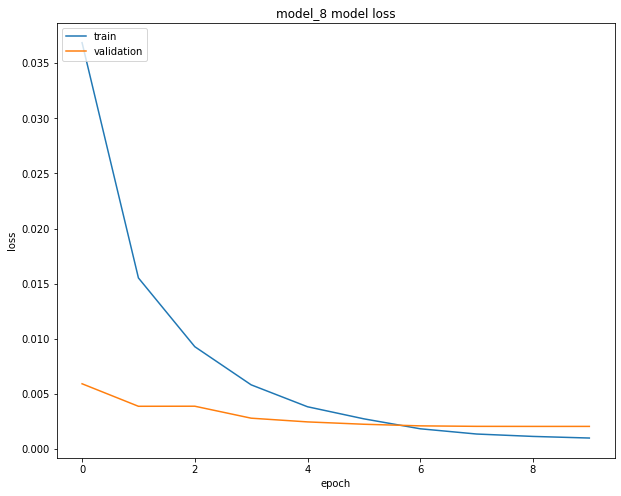

In [1202]:
_ = plotTrain(hist_model_8, "model_8")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1203]:
print("The number of weights in this model is {}.".format(model_8.count_params()))

The number of weights in this model is 53201.


In [1204]:
results.append(['model_8'] + model_8.evaluate(X_train_model_8, Y_train_model8)[:2])
in_sample_pred = model_8.predict(X_train_model_8)
len(in_sample_pred)

105/105 [==============================] - 1s 11ms/step - loss: 8.0876e-04 - asset_return: 0.1217 - mse: 7.9577e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3349

In [1205]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_8 model" has in-sample MSE 0.000809, 
whole-period compounded return rate 0.1217.


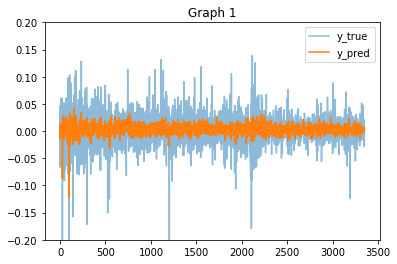

In [1206]:
plt.plot(np.array(Y_train_model8), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

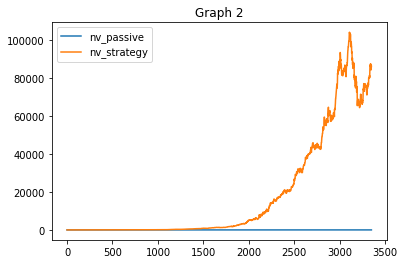

In [1207]:
nv = net_value(np.array(Y_train_model8).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train_model8) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1208]:
results[-1].extend(model_8.evaluate(X_cv_model_8, Y_cv_model8)[:2])
out_sample_pred = model_8.predict(X_cv_model_8)
len(out_sample_pred)
results

14/14 [==============================] - 0s 10ms/step - loss: 0.0021 - asset_return: -0.0429 - mse: 0.0020


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081],
 ['model_3',
  0.0008551109931431711,
  0.08122507482767105,
  0.002084811683744192,
  -0.04964093118906021],
 ['model_4',
  0.0008350167772732675,
  0.08300109207630157,
  0.0019694636575877666,
  0.027255283668637276],
 ['model_5',
  0.0008285818621516228,
  0.10663911700248718,
  0.0019584977999329567,
  0.03126559779047966],
 ['model_6',
  0.0008717692689970136,
  0.0657421126961708,
  0.0021893836092203856,
  -0.030602892860770226],
 ['model_7',
  0.000814608356449753,
  0.10386872291564941,
  0.002061836188659072,
  -0.05065988376736641],
 ['model_8',
  0.0008087604655884206,
  0.12171053141355515,
  0.0020625069737434387,
  -0.042948316782712936]]

In [1209]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_8 model" has out-sample MSE 0.002063, 
whole-period compounded return rate -0.0429.


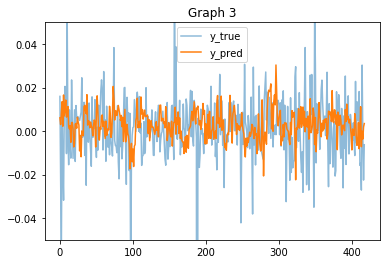

In [1210]:
plt.plot(np.array(Y_cv_model8), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

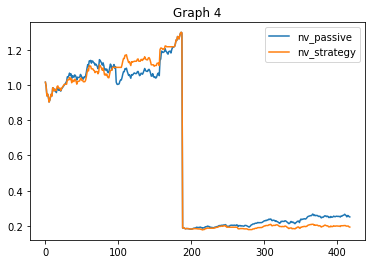

In [1211]:
nv = net_value(np.array(Y_cv_model8).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv_model8) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

### Conclusion
Apparently, model 8 has similar issue as model 7. Only, model 8, with the joining of more variables, has a more severe overfitting problem. In graph 4, the two strategies are almost identical. In graph 3, the predicted return rate has little variation.

# *Transformer 9* Design - Autoencoder
The purpose of this section is to create a function that is able to achieve auto encoder and decoder. The purpose of it is to denoise the original data. Basically, it's adding an additional data preprocess step at the end. Let's take the processced data, ``X_cv_model_8``, ``X_train_model_8`` as an example. 

In [1212]:
cv_8_shape, train_8_shape = X_cv_model_8.shape, X_train_model_8.shape

In [1213]:
def AutoEncoder(shape, dim=24):
    flat_num = shape[0]*shape[1]
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=shape))
    model.add(layers.Dense(dim, activation='relu'))
    model.add(layers.Dense(flat_num, activation='linear'))
    model.add(layers.Reshape(shape))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=["mse"])
    return model

ae_model = AutoEncoder((train_8_shape[1], train_8_shape[2]))
ae_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 7735)              0         
                                                                 
 dense_2 (Dense)             (None, 24)                185664    
                                                                 
 dense_3 (Dense)             (None, 7735)              193375    
                                                                 
 reshape (Reshape)           (None, 91, 85)            0         
                                                                 
Total params: 379,039
Trainable params: 379,039
Non-trainable params: 0
_________________________________________________________________


In [1214]:
ae_model.fit(X_train_model_8, X_train_model_8, epochs=10, validation_data=(X_cv_model_8, X_cv_model_8), shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
105/105 [==============================] - ETA: 0s - loss: 0.9896 - mse: 0.9896WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe434044f80> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

In [1215]:
ae_model.predict(X_train_model_8).shape, ae_model.predict(X_cv_model_8).shape

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


((3349, 91, 85), (418, 91, 85))

To sum up, I create the following ``OneStepAuto`` to wrap up this transformer 9.

In [1216]:
def OneStepAuto(X_train, X_cv, dim=24, dir=None):
    shape3 = X_train.shape
    ae_model = AutoEncoder((shape3[1], shape3[2]), dim=dim)
    ae_model.fit(X_train, X_train, epochs=10, validation_data=(X_cv, X_cv), shuffle=False)
    if dir:
        with open(dir+'_autoencoder.pkl','wb') as f:
            pickle.dump(ae_model,f)
    return ae_model.predict(X_train), ae_model.predict(X_cv)

In [1217]:
Xt, Xcv = OneStepAuto(X_train_model_8, X_cv_model_8)
Xt.shape, Xcv.shape

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
102/105 [============================>.] - ETA: 0s - loss: 0.9988 - mse: 0.9988WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe4ae088b90> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

((3349, 91, 85), (418, 91, 85))

# *Model 10* Design
## Autoencoder X *Model 5*

In [1218]:
X_train_x_model_5, X_cv_x_model_5 = OneStepAuto(X_train_model_5, X_cv_model_5, dir='./models/model_10/model_10')

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
104/105 [============================>.] - ETA: 0s - loss: 1.0024 - mse: 1.0024WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe436d2fc20> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

In [1219]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow.keras import regularizers

def convNN(nlayer, filters, kernel_size, dropout, regulize):
    model = keras.Sequential()
    for i in range(nlayer):
        model.add(layers.Conv1D(filters=filters, 
                                kernel_size=kernel_size, 
                                activation='relu', 
                                data_format='channels_last', 
                                padding='valid'))
        model.add(layers.MaxPooling1D(pool_size=2, 
                                    padding='valid'))
    model.add(layers.Dropout(rate=dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(1 ,activation = "linear", kernel_regularizer=regularizers.L2(regulize), bias_regularizer=regularizers.L2(regulize), activity_regularizer=regularizers.L2(regulize)))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    kernel_size = hp.Int('kernel_size', min_value=3, max_value=7, step=1)
    filters = hp.Int('filters', min_value=32, max_value=96, step=16)
    nlayer = hp.Int('nlayer', min_value=2, max_value=3, step=1)
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.35, step=0.1)
    regulize = hp.Float('regulize', min_value=1e-6, max_value=1e-3, sampling='log')
    model = convNN(nlayer, filters, kernel_size, dropout, regulize)
    return model

callback_5 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='dir10',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_x_model_5, Y_train_model5, epochs=10, validation_data=(X_cv_x_model_5, Y_cv_model5), callbacks=[callback_5], shuffle=False)

Trial 60 Complete [00h 00m 07s]
val_loss: 0.00203584018163383

Best val_loss So Far: 0.001943998970091343
Total elapsed time: 00h 11m 20s
INFO:tensorflow:Oracle triggered exit


In [1220]:
print(tuner.results_summary())
model_10_best_params = tuner.get_best_hyperparameters()[0]
model_10 = build_model(model_10_best_params)
model_10.build(input_shape=(None, X_train_x_model_5.shape[1], X_train_x_model_5.shape[2]))

Results summary
Results in dir10/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
kernel_size: 5
filters: 80
nlayer: 2
dropout: 0.15000000000000002
regulize: 6.704685198669861e-06
Score: 0.001943998970091343
Trial summary
Hyperparameters:
kernel_size: 6
filters: 64
nlayer: 2
dropout: 0.35000000000000003
regulize: 1.6565034877908204e-06
Score: 0.001944687683135271
Trial summary
Hyperparameters:
kernel_size: 4
filters: 80
nlayer: 3
dropout: 0.25000000000000006
regulize: 1.827698100987925e-06
Score: 0.0019484682707116008
Trial summary
Hyperparameters:
kernel_size: 7
filters: 48
nlayer: 2
dropout: 0.25000000000000006
regulize: 1.314641370640391e-05
Score: 0.001952540478669107
Trial summary
Hyperparameters:
kernel_size: 7
filters: 64
nlayer: 2
dropout: 0.15000000000000002
regulize: 1.6308979287756594e-06
Score: 0.0019571161828935146
Trial summary
Hyperparameters:
kernel_size: 4
filters: 64
nlayer: 3
dropout: 0.05
regulize: 1.

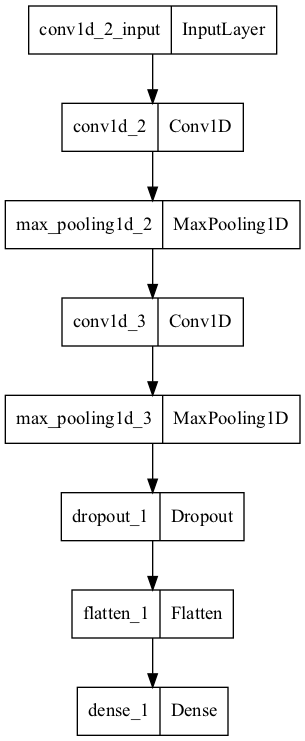

In [1221]:
keras.utils.plot_model(model_10)

In [1222]:
model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 87, 80)            13680     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 43, 80)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 39, 80)            32080     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 19, 80)           0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 19, 80)            0         
                                                                 
 flatten_1 (Flatten)         (None, 1520)             

In [1223]:
hist_model_10 = model_10.fit(X_train_x_model_5, Y_train_model5, epochs=10, validation_data=(X_cv_x_model_5, Y_cv_model5), callbacks=[callback_5], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
104/105 [============================>.] - ETA: 0s - loss: 0.0075 - asset_return: 0.0270 - mse: 0.0075WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe4ae8c8d40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

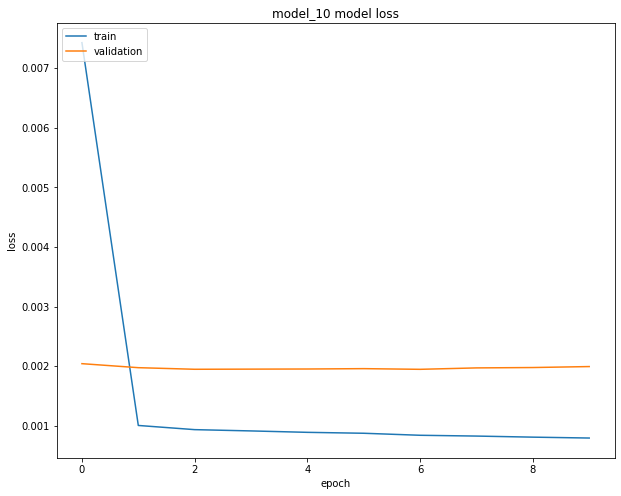

In [1224]:
_ = plotTrain(hist_model_10, "model_10")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1225]:
print("The number of weights in this model is {}.".format(model_10.count_params()))

The number of weights in this model is 47281.


In [1226]:
results.append(['model_10'] + model_10.evaluate(X_train_x_model_5, Y_train_model5)[:2])
in_sample_pred = model_10.predict(X_train_x_model_5)
len(in_sample_pred)

105/105 [==============================] - 0s 4ms/step - loss: 7.4271e-04 - asset_return: 0.1947 - mse: 7.3069e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3349

In [1227]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_10 model" has in-sample MSE 0.000743, 
whole-period compounded return rate 0.1947.


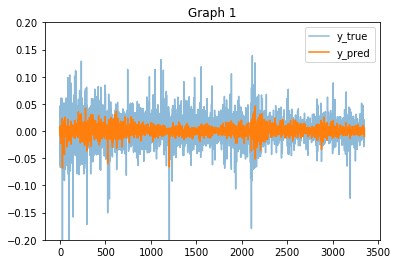

In [1228]:
plt.plot(np.array(Y_train_model5), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

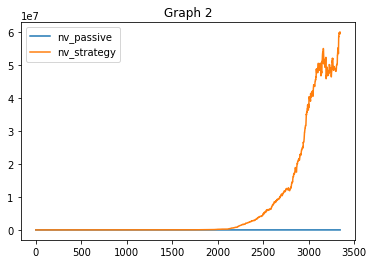

In [1229]:
nv = net_value(np.array(Y_train_model5).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train_model5) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1230]:
results[-1].extend(model_10.evaluate(X_cv_x_model_5, Y_cv_model5)[:2])
out_sample_pred = model_10.predict(X_cv_x_model_5)
len(out_sample_pred)
results

14/14 [==============================] - 0s 2ms/step - loss: 0.0020 - asset_return: -0.0417 - mse: 0.0020   


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081],
 ['model_3',
  0.0008551109931431711,
  0.08122507482767105,
  0.002084811683744192,
  -0.04964093118906021],
 ['model_4',
  0.0008350167772732675,
  0.08300109207630157,
  0.0019694636575877666,
  0.027255283668637276],
 ['model_5',
  0.0008285818621516228,
  0.10663911700248718,
  0.0019584977999329567,
  0.03126559779047966],
 ['model_6',
  0.0008717692689970136,
  0.0657421126961708,
  0.0021893836092203856,
  -0.030602892860770226],
 ['model_7',
  0.000814608356449753,
  0.10386872291564941,
  0.002061836188659072,
  -0.05065988376736641],
 ['model_8',
  0.0008087604655884206,
  0.12171053141355515,
  0.0020625069737434387,
  -0.042948316782712936],
 ['model_10',
  0.0007427076925523579,
  0.1946692317724228,
  0.001993907382711768,
  -0.04168417677283287]]

In [1231]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_10 model" has out-sample MSE 0.001994, 
whole-period compounded return rate -0.0417.


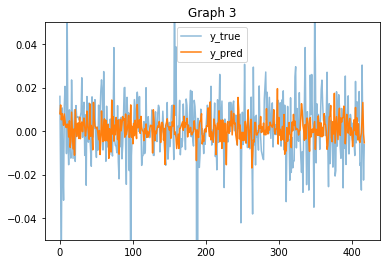

In [1232]:
plt.plot(np.array(Y_cv_model5), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

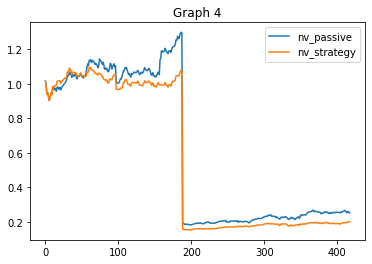

In [1233]:
nv = net_value(np.array(Y_cv_model5).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv_model5) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

## Conclusion

Considering this is a CNN model, it seems denoising by autoencoder can not improve its out sample prediction. Comparing with model 5, the out-sample mse is larger in model 10. So this is a bad trial. I will not choose this model. 

# *Model 11* Design
## Autoencoder X *Model 7*

In [1234]:
X_train_x_model_7, X_cv_x_model_7 = OneStepAuto(X_train_model_7, X_cv_model_7, dir='./models/model_11/model_11')

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
102/105 [============================>.] - ETA: 0s - loss: 1.0084 - mse: 1.0084WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe4afdc6ef0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

In [1236]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from tensorflow.keras import regularizers

def LSTM(nlayer, dropout, regulize, units, lsunits):
    model = keras.Sequential()
    model.add(layers.LSTM(units=lsunits))
    for i in range(nlayer):
        model.add(layers.Dense(units=units, activation='relu'))
        model.add(layers.Dropout(rate=dropout))
    model.add(layers.Flatten())
    model.add(layers.Dense(1 ,activation = "linear", kernel_regularizer=regularizers.L2(regulize), bias_regularizer=regularizers.L2(regulize), activity_regularizer=regularizers.L2(regulize)))
    model.compile(optimizer='Adam', 
                  loss='mse', 
                  metrics=[asset_return, "mse"])
    return model
    
def build_model(hp):
    nlayer = hp.Int('nlayer', min_value=0, max_value=1, step=1)
    dropout = hp.Float('dropout', min_value=0.05, max_value=0.35, step=0.1)
    regulize = hp.Float('regulize', min_value=1e-6, max_value=1e-3, sampling='log')
    units = hp.Int('units', min_value=8, max_value=16, step=4)
    lsunits = hp.Int('lsunits', min_value=16, max_value=96, step=8)
    model = LSTM(nlayer, dropout, regulize, units, lsunits)
    return model

callback_7 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    executions_per_trial = 1, 
    directory ='dir11',
    overwrite=True,
    max_trials= 60,
    seed=42)
tuner.search(X_train_x_model_7, Y_train_model7, epochs=10, validation_data=(X_cv_x_model_7, Y_cv_model7), callbacks=[callback_7], shuffle=False)

Trial 60 Complete [00h 00m 26s]
val_loss: 0.001929680583998561

Best val_loss So Far: 0.0019273740472272038
Total elapsed time: 00h 27m 44s
INFO:tensorflow:Oracle triggered exit


In [1237]:
print(tuner.results_summary())
model_11_best_params = tuner.get_best_hyperparameters()[0]
model_11 = build_model(model_11_best_params)
model_11.build(input_shape=(None, X_train_x_model_7.shape[1], X_train_x_model_7.shape[2]))

Results summary
Results in dir11/untitled_project
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
nlayer: 0
dropout: 0.25000000000000006
regulize: 5.842281792975203e-06
units: 16
lsunits: 80
Score: 0.0019273740472272038
Trial summary
Hyperparameters:
nlayer: 0
dropout: 0.05
regulize: 2.6528408220216513e-06
units: 12
lsunits: 64
Score: 0.001929680583998561
Trial summary
Hyperparameters:
nlayer: 0
dropout: 0.25000000000000006
regulize: 4.704965297508379e-06
units: 12
lsunits: 56
Score: 0.001934856059961021
Trial summary
Hyperparameters:
nlayer: 0
dropout: 0.25000000000000006
regulize: 1.5872740971656703e-06
units: 12
lsunits: 32
Score: 0.0019354429095983505
Trial summary
Hyperparameters:
nlayer: 0
dropout: 0.25000000000000006
regulize: 1.3142831172739238e-06
units: 8
lsunits: 48
Score: 0.0019356913398951292
Trial summary
Hyperparameters:
nlayer: 0
dropout: 0.25000000000000006
regulize: 1.3171570611137189e-06
units: 16
lsunits: 56
Score: 0

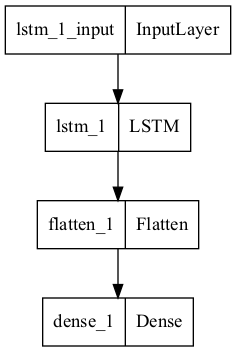

In [1238]:
keras.utils.plot_model(model_11)

In [1239]:
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 80)                36800     
                                                                 
 flatten_1 (Flatten)         (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 36,881
Trainable params: 36,881
Non-trainable params: 0
_________________________________________________________________


In [1240]:
hist_model_11 = model_11.fit(X_train_x_model_7, Y_train_model7, epochs=10, validation_data=(X_cv_x_model_7, Y_cv_model7), callbacks=[callback_7], shuffle=False)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
104/105 [============================>.] - ETA: 0s - loss: 0.0011 - asset_return: 0.0259 - mse: 0.0011WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe50e705d40> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH

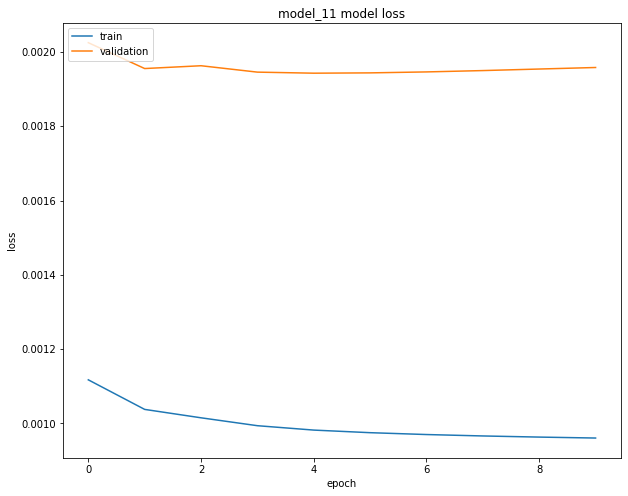

In [1241]:
_ = plotTrain(hist_model_11, "model_11")

## Error analysis
As for the error analysis, I will implement it from the following perspectives:
- General specification of the model
- Analysis of the in-sample prediction
- Analysis of the out-of sample prediction
- Strategy performance.

### In-sample performance

In [1242]:
print("The number of weights in this model is {}.".format(model_11.count_params()))

The number of weights in this model is 36881.


In [1243]:
results.append(['model_11'] + model_11.evaluate(X_train_x_model_7, Y_train_model7)[:2])
in_sample_pred = model_11.predict(X_train_x_model_7)
len(in_sample_pred)

105/105 [==============================] - 1s 10ms/step - loss: 9.2622e-04 - asset_return: 0.0534 - mse: 9.1990e-04
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


3349

In [1244]:
print("\"{} model\" has in-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][1], 
                                              results[-1][2]))

"model_11 model" has in-sample MSE 0.000926, 
whole-period compounded return rate 0.0534.


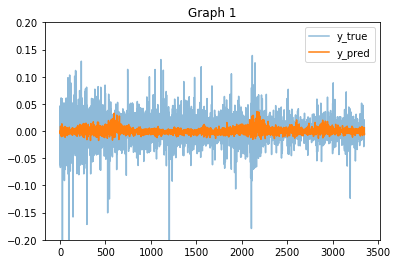

In [1245]:
plt.plot(np.array(Y_train_model7), alpha=0.5, label='y_true')
plt.plot(in_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 1')
plt.ylim(-0.2, 0.2)
_ = plt.legend()

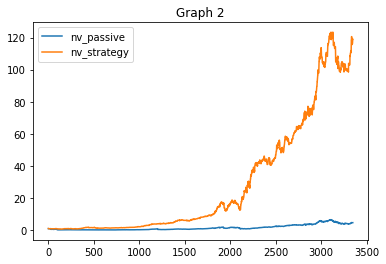

In [1246]:
nv = net_value(np.array(Y_train_model7).reshape((-1, 1)), in_sample_pred)
plt.plot(np.cumprod(np.array(Y_train_model7) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 2')
_ = plt.legend()

 ### Out-sample performance

In [1247]:
results[-1].extend(model_11.evaluate(X_cv_x_model_7, Y_cv_model7)[:2])
out_sample_pred = model_11.predict(X_cv_x_model_7)
len(out_sample_pred)
results

14/14 [==============================] - 0s 9ms/step - loss: 0.0020 - asset_return: 0.0210 - mse: 0.0020


[['model_1',
  0.0009614064474590123,
  0.03664696589112282,
  0.0019242799608036876,
  -0.014326214790344238],
 ['model_2',
  0.000959283672273159,
  0.043872807174921036,
  0.0019383876351639628,
  -0.03351530060172081],
 ['model_3',
  0.0008551109931431711,
  0.08122507482767105,
  0.002084811683744192,
  -0.04964093118906021],
 ['model_4',
  0.0008350167772732675,
  0.08300109207630157,
  0.0019694636575877666,
  0.027255283668637276],
 ['model_5',
  0.0008285818621516228,
  0.10663911700248718,
  0.0019584977999329567,
  0.03126559779047966],
 ['model_6',
  0.0008717692689970136,
  0.0657421126961708,
  0.0021893836092203856,
  -0.030602892860770226],
 ['model_7',
  0.000814608356449753,
  0.10386872291564941,
  0.002061836188659072,
  -0.05065988376736641],
 ['model_8',
  0.0008087604655884206,
  0.12171053141355515,
  0.0020625069737434387,
  -0.042948316782712936],
 ['model_10',
  0.0007427076925523579,
  0.1946692317724228,
  0.001993907382711768,
  -0.04168417677283287],
 ['m

In [1248]:
print("\"{} model\" has out-sample MSE {:.6f}, \nwhole-period compounded return rate {:.4f}.".format(results[-1][0], results[-1][3], 
                                              results[-1][4]))

"model_11 model" has out-sample MSE 0.001958, 
whole-period compounded return rate 0.0210.


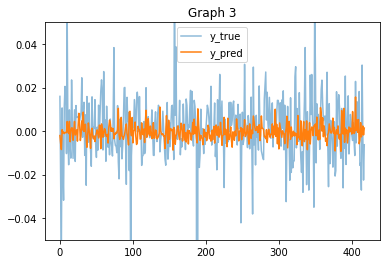

In [1249]:
plt.plot(np.array(Y_cv_model7), alpha=0.5, label='y_true')
plt.plot(out_sample_pred.reshape(-1), label='y_pred')
plt.title('Graph 3')
plt.ylim(-0.05, 0.05)
_ = plt.legend()

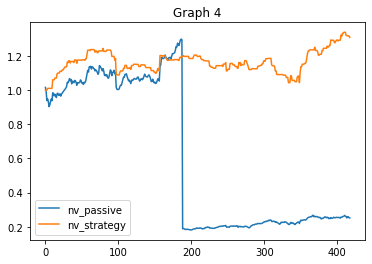

In [1250]:
nv = net_value(np.array(Y_cv_model7).reshape((-1, 1)), out_sample_pred)
plt.plot(np.cumprod(np.array(Y_cv_model7) + 1), label='nv_passive')
plt.plot(nv, label='nv_strategy')
plt.title('Graph 4')
_ = plt.legend()

## Conclusion
Adding an autoencoder improves the performance of LSTM model. It has larger in-sample mse and smaller out-sample mse comparing with model 7. Hence, it's a great trial to add this autoencoder. The LSTM model has more accurate prediction with less overfitting problem.

Looking at the out-sample net value curve, it has stable trading logic. Before the market has a large drawdown, this strategy stops investing. So I believe this model has great applicable value. Before the drawdown, this strategy consistently outperform doing-nothing strategy. 

# Fine Tune
## Result analysis
Here, I organize the performance data of the aforesaid 10 models into a single data frame. 

In [1251]:
pd.DataFrame(results, columns=['Model #', "In-samp MSE", "In-samp Ret", "Out-samp MSE", "Out-samp Ret"])

,Model #,In-samp MSE,In-samp Ret,Out-samp MSE,Out-samp Ret
0,model_1,0.000961,0.036647,0.001924,-0.014326
1,model_2,0.000959,0.043873,0.001938,-0.033515
2,model_3,0.000855,0.081225,0.002085,-0.049641
3,model_4,0.000835,0.083001,0.001969,0.027255
4,model_5,0.000829,0.106639,0.001958,0.031266
5,model_6,0.000872,0.065742,0.002189,-0.030603
6,model_7,0.000815,0.103869,0.002062,-0.050660
7,model_8,0.000809,0.121711,0.002063,-0.042948
8,model_10,0.000743,0.194669,0.001994,-0.041684
9,model_11,0.000926,0.053388,0.001958,0.020956


The choice of our model is mostly based on out-sample mse. To assist this process, I will look at the in-sample mse (to determine whether there is strong overfitting), out-sample net value curve (to determine whether there is rational transaction logic behind the corresponding strategy). 

Based on the main choosing criterion, I select model 11 based on the following reasons:
- Model 1, 2, 4, 11 have out-sample mse lower than 0.00196.
- To avoid overfitting, model 1, 2, 11 have in-sample MSE greater than 0.0009. 
- Model 4, 5, 11 have positive out-sample return. 
- To avoid overfitting, model 11 has moderate level of in-sample return rate at 5.3%. 

## Hyperparameter tuning
This process has already been implemented as we iteratively choose the best model of among the 10 model design using keras tuner's random search.

# Test and Model Saving
## Test on test set
Here, I will test *Model 11* using its correponding test set self-made during the train test split process. 

<u>
The test data will be prepared using the saved pipelines and functions to avoid data leakage. 
<u>

In [1253]:
print("Shape of training set and test set: ", X_test7.shape, Y_test7.shape, end='.\n')

Shape of training set and test set:  (418, 91, 34) (418,).


In [1256]:
# load autoencoder model
with open(os.path.join('.', 'models', 'model_11', 'model_11_autoencoder.pkl'), 'rb') as f:
    ae_recovered = pickle.load(f)
# load model pipeline
with open(os.path.join('.', 'models', 'model_7', 'model_7_pipeline.pkl'), 'rb') as f:
    pipe_recovered = pickle.load(f)
# load model raw function
with open(os.path.join('.', 'models', 'model_7', 'model_7_raw_func.pkl'), 'rb') as f:
    func_recovered = pickle.load(f)
print(ae_recovered, pipe_recovered, func_recovered)

<keras.engine.sequential.Sequential object at 0x7fe4b75fc3d0> Pipeline(steps=[('Winsor', Winsor()), ('Scaler', StandardScaler())]) <function flatten3D at 0x7fe5c4b718c0>


As we can see, the trained data preprocess components have been successfully loaded. I will use them to preprocess features in the test set in the same process.  

In [1258]:
shape_test = X_test7.shape
X_test7_1 = pipe_recovered.transform(func_recovered(X_test7))
X_test7_2 = X_test7_1.reshape(shape_test)
X_test7_3 = ae_recovered.predict(X_test7_2)
X_test7_3.shape

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


(418, 91, 34)

Now, let's test it on the preprocessed test set.  

In [1260]:
asset_ret, mse = model_11.evaluate(X_test7_3, Y_test7)[1:]
print('The mse in the test set is {:.6f}, the return rate is {:.4f}'.format(mse, asset_ret), end='.\n')

14/14 [==============================] - 0s 12ms/step - loss: 2.7404e-04 - asset_return: 0.0027 - mse: 2.6772e-04
The mse in the test set is 0.000268, the return rate is 0.0027.


This level of MSE is acceptable. 

## Re-train
Next, I will train the model using the whole data. 

In [1263]:
X_final, Y_final = Generate3DTime(var_ls=['Close', 'Volume'])
X_final.shape, Y_final.shape

Data acquisition completed! Close, Volume
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185,)
(4185, 91, 34)


((4185, 91, 34), (4185,))

In [1266]:
def Pipe_model_final():
    return Pipeline([("Winsor", Winsor()), ("Scaler", StandardScaler())])

X_train_f, X_cv_f, Y_train_f, Y_cv_f = train_test_split(X_final, Y_final, test_size=X_final.shape[0]//10, shuffle=False)
shape_f_1, shape_f_2 = X_train_f.shape, X_cv_f.shape
X_train_f, X_cv_f = GeneralPrepare(X_train_f, X_cv_f, func_recovered, Pipe_model_final, "./final_preprocess/final_model")
X_train_f, X_cv_f = X_train_f.reshape(shape_f_1), X_cv_f.reshape(shape_f_2)
X_train_f, X_cv_f = OneStepAuto(X_train_f, X_cv_f, dir='./final_preprocess/final_model')

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
115/118 [============================>.] - ETA: 0s - loss: 1.0044 - mse: 1.0044WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fe4ae815560> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

In [1]:
hist_f = model_11.fit(X_train_f, Y_train_f, epochs=10, validation_data=(X_cv_f, Y_cv_f), callbacks=[callback_7], shuffle=False)

NameError: name 'model_11' is not defined

# Save MyModel, Test on Sample
## MyModel

In [ ]:
from tensorflow.keras.models import load_model
import os
import tensorflow as tf
import math
import pandas as pd
import numpy as np
import pickle
from sklearn.base import BaseEstimator, TransformerMixin

modelName = "final_model"
model_path = os.path.join(".", modelName)

def flatten3D(mat3D):
    ori_shape = mat3D.shape
    mat2D = mat3D.reshape((ori_shape[0], ori_shape[1] * ori_shape[2]))
    return mat2D

class Winsor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        X_new = pd.DataFrame(np.array(X).copy())
        self.High = []
        self.Low = []
        for col in X_new.columns:
            self.High.append(X_new[col].quantile(0.9))
            self.Low.append(X_new[col].quantile(0.1))
        return self

    def transform(self, X, y=None):
        X_new = pd.DataFrame(np.array(X).copy())
        for i, col in enumerate(X_new.columns):
            high = self.High[i]
            low = self.Low[i]
            X_new.loc[X_new[col] > high, col] = high
            X_new.loc[X_new[col] < low, col] = low
        return X_new.values

def GenerateTest(dir, lag = 90, var_ls=['Close', 'Volume']):
    comp_list = ['CSCO', 'ADBE', 'XLE', 'INTC', 'XLF', 
                 'XLP', 'MSFT', 'XLB', 'XLU', 'NVDA', 
                 'XLV', 'IBM', 'XLY', 'XLK', 'SPY', 'XLI', 'AAPL']
    data = easyAccess.lsGetCompData(var_ls=var_ls, comp_ls=comp_list, data_path=dir).pct_change()
    data.columns = ['pct ' + x for x in data.columns]
    X = []
    for col in data.columns:
        temp = data[[col]].copy()
        for i in range(1, lag+1):
            temp[str(i) + col] = temp[col].shift(i)
        temp.dropna(inplace=True)
        X.append(temp.values)
    X = np.array(X)
    X = np.swapaxes(X, 0, 1)
    X = np.swapaxes(X, 1, 2)
    ## spatial in time order
    X = X[:, ::-1, :]
    idx = data.iloc[- X.shape[0]:, ].index
    print(X.shape, idx.shape)
    return X, idx

class easyAccess:
    def __init__(self, data_path='./Data/train'):
        self.data_path = data_path
        self.file_names = os.listdir(data_path)
        self.comp_names = [x.split('.')[0] for x in self.file_names]
        self.file_dict = dict(zip(self.comp_names, self.file_names))
    
    @classmethod
    def printAll(cls, data_path='./Data/train', mute=True):
        obj = cls(data_path)
        if not mute:
            for i, comp in enumerate(obj.comp_names):
                print(i+1, comp)
        return obj.comp_names
    
    @classmethod
    def printDetail(cls, data_path='./Data/train'):
        obj = cls(data_path)
        for key, value in obj.file_dict.items():
            print(key, end=':\t')
            df = pd.read_csv(os.path.join(obj.data_path, value))
            print(", ".join(list(df.columns)))
    
    @classmethod
    def lsGetData(cls, var_ls=None, data_path='./Data/train'):
        """
        Get data by transferring in a variable-name list and fetch data for all the companies. 
        """
        if not var_ls or var_ls == []:
            return None
        obj = cls(data_path)
        result = None
        for key, value in obj.file_dict.items():
            df = pd.read_csv(os.path.join(obj.data_path, value))
            df['Dt'] = pd.to_datetime(df['Dt'], format='%Y-%m-%d')
            df.set_index('Dt', inplace=True)
            df = df[var_ls]
            df.columns = [' '.join([key, x]) for x in df.columns]
            if result is None:
                result = df
            else:
                result = result.merge(df, how='outer', left_index=True, right_index=True)
        print('Data acquisition completed!', ", ".join(var_ls))
        return result
                
    @classmethod
    def lsGetCompData(cls, var_ls=None, comp_ls=None, data_path='./Data/train'):
        """
        Get data by transferring in a variable-name list and fetch data for all the companies. 
        """
        if not var_ls or var_ls == []:
            return None
        obj = cls(data_path)
        result = None
        for key in comp_ls:
            value = obj.file_dict[key]
            df = pd.read_csv(os.path.join(obj.data_path, value))
            df['Dt'] = pd.to_datetime(df['Dt'], format='%Y-%m-%d')
            df.set_index('Dt', inplace=True)
            df = df[var_ls]
            df.columns = [' '.join([key, x]) for x in df.columns]
            if result is None:
                result = df
            else:
                result = result.merge(df, how='outer', left_index=True, right_index=True)
        print('Data acquisition completed!', ", ".join(var_ls))
        return result
        

def saveModel(model, model_path): 
    try:
        os.makedirs(model_path)
    except OSError:
        print("Directory {dir:s} already exists, files will be over-written.".format(dir=model_path))
        
    # Save JSON config to disk
    json_config = model.to_json()
    with open(os.path.join(model_path, 'config.json'), 'w') as json_file:
        json_file.write(json_config)
    # Save weights to disk
    model.save_weights(os.path.join(model_path, 'weights.h5'))
    
    print("Model saved in directory {dir:s}; create an archive of this directory and submit with your assignment.".format(dir=model_path))
    
def loadModel(model_path):
    # Reload the model from the 2 files we saved
    with open(os.path.join(model_path, 'config.json')) as json_file:
        json_config = json_file.read()
    model = tf.keras.models.model_from_json(json_config)
    model.load_weights(os.path.join(model_path, 'weights.h5'))
    
    return model

def MyModel(test_dir, model_path):
    # YOU MAY NOT change model after this statement !
    model = loadModel(model_path)

    # It should run model to create an array of predictions; we initialize it to the empty array for convenience
    predictions = []
    
    # We need to match your array of predictions with the examples you are predicting
    # The array below (ids) should have a one-to-one correspondence and identify the example your are predicting
    # For Bankruptcy: the Id column
    # For Stock prediction: the date on which you are making a prediction
    ids = []
    
    # YOUR CODE GOES HERE
    X_raw, idx = GenerateTest(dir=test_dir, lag = 90, var_ls = ['Close', 'Volume'])

    # load autoencoder model
    with open(os.path.join('.', 'final_preprocess', 'final_model_autoencoder.pkl'), 'rb') as f:
        ae_recovered = pickle.load(f)
    # load model pipeline
    with open(os.path.join('.', 'final_preprocess', 'final_model_pipeline.pkl'), 'rb') as f:
        pipe_recovered = pickle.load(f)
    # load model raw function
    with open(os.path.join('.', 'final_preprocess', 'final_model_raw_func.pkl'), 'rb') as f:
        func_recovered = pickle.load(f)
    
    print(ae_recovered, pipe_recovered, func_recovered)

    shape_test = X_raw.shape
    X_raw = pipe_recovered.transform(func_recovered(X_raw))
    X_raw = X_raw.reshape(shape_test)
    X_raw = ae_recovered.predict(X_raw)
    X_raw.shape
    print(X_raw.shape)

    model_f = loadModel(model_path)
    y_pred = model_f.predict(X_raw)
    
    predictions = y_pred[-200:].reshape([-1])
    ids = np.array(idx)[-200:]

    return predictions, ids

# Assign to variable my_model the model that is your final model (the one  you will be evaluated on)
model_11 = loadModel(model_path)
my_model = model_11 # CHANGE None to your model !

saveModel(my_model, model_path)

Directory ./final_model already exists, files will be over-written.
Model saved in directory ./final_model; create an archive of this directory and submit with your assignment.


## Test on sample

In [ ]:
holdout_dir = os.path.join(".", "Data", "sample")
predicts = MyModel(holdout_dir, model_path)

Data acquisition completed! Close, Volume
(251, 34) DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09'],
              dtype='datetime64[ns]', name='Dt', freq=None) DatetimeIndex(['2017-12-22', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29'],
              dtype='datetime64[ns]', name='Dt', freq=None)
(160, 91, 34) (160,)
<keras.engine.sequential.Sequential object at 0x7fde25b2bcd0> Pipeline(steps=[('Winsor', Winsor()), ('Scaler', StandardScaler())]) <function flatten3D at 0x7fde22d10d40>
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSI

In [ ]:
print("Done!")

Done!
